# Table of Contents

1. [Análisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad](#análisis-del-comportamiento-de-los-anuncios-de-meta-ads-de-la-constructora-xiudad)  
    1.1 [CONTEXTO](#contexto)  
    1.2 [DESCRIPCIÓN DE CAMPOS](#descripción-de-campos)  
    1.3 [Análisis inicial del Dataset](#análisis-inicial-del-dataset)  
    1.4 [Información básica de cada columna](#información-básica-de-cada-columna)  
    1.5 [Análisis estadístico inicial del dataset](#análisis-estadístico-inicial-del-dataset)  
    1.6 [Revisión de datos nulos por columna](#revisión-de-datos-nulos-por-columna)  
        1.6.1 [Imputación de valores nulos](#imputación-de-valores-nulos)  
    1.7 [Filtro por objetivo de campaña](#filtro-por-objetivo-de-campaña)  
        1.7.1 [Distribución de Resultados por objetivo de campaña](#distribución-de-resultados-por-objetivo-de-campaña)  
        1.7.2 [Boxplots de Resultados por objetivo de campaña](#boxplots-de-resultados-por-objetivo-de-campaña)  
    1.8 [Distribución de métricas de desempeño y costos por objetivo de campaña](#distribución-de-métricas-de-desempeño-y-costos-por-objetivo-de-campaña)  
        1.8.1 [Conclusiones sobre métricas de desempeño y costos](#conclusiones-sobre-métricas-de-desempeño-y-costos)  
    1.9 [Distribución de variables categóricas por objetivo de campaña](#distribución-de-variables-categóricas-por-objetivo-de-campaña)  
        1.9.1 [Análisis univariado de variables categóricas](#análisis-univariado-de-variables-categóricas)  
    1.10 [Análisis Bivariado y correlaciones entre variables](#análisis-bivariado-y-correlaciones-entre-variables)  
    1.11 [Análisis de correlaciones por objetivo](#análisis-de-correlaciones-por-objetivo)  
    1.12 [Relación entre variables categóricas y Resultados (Test de Kruskal-Wallis)](#relación-entre-variables-categóricas-y-resultados-test-de-kruskal-wallis)  
        1.12.1 [Principales hallazgos](#principales-hallazgos)  
    1.13 [Selección de variables por objetivo](#selección-de-variables-por-objetivo)  
        1.13.1 [¿Por qué mantener variables con multicolinealidad?](#por-qué-mantener-variables-con-multicolinealidad)  
        1.13.2 [Tratamiento de la multicolinealidad](#tratamiento-de-la-multicolinealidad)  
    1.14 [Relación entre variables numéricas y Resultados](#relación-entre-variables-numéricas-y-resultados)  
        1.14.1 [Conclusiones del análisis bivariado de variables numéricas y Resultados](#conclusiones-del-análisis-bivariado-de-variables-numéricas-y-resultados)  
    1.15 [Análisis Bivariado de variables categóricas y Resultados](#análisis-bivariado-de-variables-categóricas-y-resultados)  
        1.15.1 [Análisis bivariado de variables categóricas y *Resultados*](#análisis-bivariado-de-variables-categóricas-y-resultados)  
2. [Limpieza de datos](#limpieza-de-datos)  
    2.1 [Manejo de valores nulos restantes](#manejo-de-valores-nulos-restantes)  
    2.2 [Transformación de la columna Mes](#transformación-de-la-columna-mes)  
3. [Modelado Predictivo y Comparación de Algoritmos por Objetivo de Campaña](#modelado-predictivo-y-comparación-de-algoritmos-por-objetivo-de-campaña)  
    3.1 [Comparación de modelos lineales vs. modelos avanzados](#comparación-de-modelos-lineales-vs-modelos-avanzados)  
        3.1.1 [Modelos lineales (Ridge, Lasso y Regresión Lineal)](#modelos-lineales-ridge-lasso-y-regresión-lineal)  
        3.1.2 [Modelos avanzados (RandomForest, GradientBoosting y XGBoost)](#modelos-avanzados-randomforest-gradientboosting-y-xgboost)  
    3.2 [Importancia de variables con Random Forest](#importancia-de-variables-con-random-forest)  
        3.2.1 [Interpretación de resultados de la importancia de variables](#interpretación-de-resultados-de-la-importancia-de-variables)  
    3.3 [Conclusión General del Proyecto](#conclusión-general-del-proyecto)  
        3.3.1 [Principales hallazgos](#principales-hallazgos)  
        3.3.2 [Limitaciones](#limitaciones)  
        3.3.3 [Recomendaciones](#recomendaciones)  

# Análisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad

In [104]:
# ================================
# Importación de librerías
# ================================

# Manejo y análisis de datos
import pandas as pd
import numpy as np
import missingno as msno  # visualización de valores nulos

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Estadística
from scipy.stats import kruskal

# Modelado y métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    r2_score, mean_squared_error, mean_absolute_error
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# XGBoost
from xgboost import XGBRegressor

# Configuración general
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Estilo de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14


## CONTEXTO

El dataset utilizado en este análisis proviene del portafolio de Meta Ads, donde se recopilan los registros de campañas digitales desarrolladas para el proyecto inmobiliario YOY Xplora, lanzado en mayo de 2024 por la Constructora Xiudad.

El proyecto tiene como objetivo la comercialización de 640 lotes residenciales en Jamundí, siendo las campañas digitales la principal fuente de generación de prospectos (leads).

El propósito del análisis es evaluar el comportamiento de los anuncios de Meta Ads, con especial énfasis en la variable "Resultados", que refleja el estado alcanzado en cada interacción (por ejemplo: visita al sitio web, lead generado, conversación con asesor, compra efectiva).

## DESCRIPCIÓN DE CAMPOS
0. Nombre de la campaña: Nombre asignado a la campaña en Meta , (Tipo de variable = Categórica )
1. Identificador de la campaña: ID único de la campaña, (Tipo de variable = Númerica)
2. Nombre del conjunto de anuncios: Nombre asignado al conjunto de anuncios de la campaña en Meta Ads, (Tipo de variable = Categórica)
3. Identificador del conjunto de anuncios: ID único del conjunto de anuncios, (Tipo de variable = Númerica)
4. Nombre del anuncio: Nombre asignado al anuncio en el conjunto de anuncios en Meta Ads, (Tipo de variable = Categórica)
5. Identificador del anuncio: ID único del anuncio, (Tipo de variable = Númerica)
6. Mes: Período de duración del conjunto de anuncios/anuncio, (Tipo de variable = Categórica)
7. Objetivo: Objetivo de la campaña (ventas, clientes potenciales, mensajes, etc), (Tipo de variable = Categórica)
8. Edad: Rango de edades con las cuales se segmentó el conjunto de anuncios, (Tipo de variable = Categórica)
9. Sexo: Segmento de género para cada conjunto de anuncios, (Tipo de variable = Categórica)
10. Llamada a la acción: Botón usado para motivar al usuario a realizar una acción, (Tipo de variable = Categórica)
11. Tipo de resultado: Tipo de conversión medida, (Tipo de variable = Categórica)
12. Resultados: Cantidad de conversiones logradas, (Tipo de variable = Númerica)
13. Importe gastado (COP): Monto invertido en campaña/conjunto de anuncios/anuncios, (Tipo de variable = Númerica)
14. Alcance: Personas únicas alcanzadas, (Tipo de variable = Númerica)
15. Impresiones: Número total de veces que se mostró un anuncio, (Tipo de variable = Númerica)
16. Costo por resultado: Costo promedio por conversión, (Tipo de variable = Númerica)
17. Clics en el enlace: Número de clic en el anuncio, (Tipo de variable = Númerica)
18. CPC (costo por clic en el enlace):Costo promedio por clic, (Tipo de variable = Númerica)
19. CPM (costo por mil impresiones): Costo promedio por mil impresiones, (Tipo de variable = Númerica)
20. CTR (todos): Porcentaje de clics sobre impresiones, (Tipo de variable = Númerica)
21. Conversaciones con mensajes iniciadas: Conversaciones de Whatsapp iniciadas, (Tipo de variable = Númerica)
22. Frecuencia: Promedio de veces que una persona vio el anuncio, (Tipo de variable = Númerica)
23. Inicio del informe: Fecha inicial del reporte, (Tipo de variable = Categórica)
24. Fin del informe: Fecha final del reporte, (Tipo de variable = Categórica)

## Análisis inicial del Dataset
Empezaremos viendo cómo está estructurado el dataset

In [105]:
# =========================
# Carga del dataset
# =========================

# Cargamos los datos del reporte de campañas de Meta Ads
df_meta = pd.read_csv("REPORTE-XPLORA-MAYO-2024-AGOSTO-2025.csv")

# Mostramos todas las columnas completas en pantalla
pd.set_option("display.max_columns", None)

# Revisamos la dimensión del dataset (filas, columnas)
df_meta.shape

(2220, 25)

In [106]:
# Mostramos los primeros registros para hacernos una idea de la estructura
df_meta.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia,Inicio del informe,Fin del informe
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,NaN,6,NaN,NaN,NaN,4333.333333,0.000000,NaN,NaN,2024-05-03,2024-05-31
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,NaN,794,NaN,5.0,1916.2,12066.750630,1.763224,NaN,NaN,2024-06-01,2024-06-30
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,NaN,86,NaN,1.0,935.0,10872.093023,1.162791,NaN,NaN,2024-05-03,2024-05-31
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,NaN,71,NaN,2.0,491.5,13845.070423,5.633803,NaN,NaN,2024-05-03,2024-05-31
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,NaN,42,NaN,2.0,433.0,20619.047619,7.142857,NaN,NaN,2024-05-03,2024-05-31


En esta parte lo que hago es cargar el dataset de Meta Ads y verificar cuántos registros y variables contiene.
Cada fila corresponde a un anuncio o interacción dentro de una campaña, y entre las columnas más importantes están:

Nombre de la campaña y del anuncio.

Objetivo de la campaña.

Segmentación de edad y sexo.

El mes de ejecución.

La variable de resultados, que muestra qué acción se logró (visita, lead, conversación, etc.).

Con esto ya tengo una primera idea de la información que voy a analizar y me aseguro de que los datos se hayan cargado correctamente.

## Información básica de cada columna
Se observa información básica sobre cada columna como índice, nombre, cantidad de no nulos, tipo de dato

In [107]:
# =========================
# Exploración general del dataset
# =========================

# Información general: número de registros, columnas, valores no nulos y tipo de dato
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nombre de la campaña                    2220 non-null   object 
 1   Identificador de la campaña             2220 non-null   int64  
 2   Nombre del conjunto de anuncios         2220 non-null   object 
 3   Identificador del conjunto de anuncios  2220 non-null   int64  
 4   Nombre del anuncio                      2220 non-null   object 
 5   Identificador del anuncio               2220 non-null   int64  
 6   Mes                                     2220 non-null   object 
 7   Objetivo                                2220 non-null   object 
 8   Edad                                    2220 non-null   object 
 9   Sexo                                    2220 non-null   object 
 10  Llamada a la acción                     2220 non-null   obje

Con este comando revisamos la estructura del dataset:

Tenemos 25 columnas en total.

La mayoría de las variables están completas, pero hay algunas columnas con muchos valores nulos.

Los tipos de datos son en su mayoría object (texto) y float64 (números con decimales).

Al revisar con más detalle encontramos lo siguiente:

Alcance aparece vacío, pero esto es normal porque cuando el objetivo de la campaña es de reconocimiento, ese valor ya está reflejado en la columna Resultados. Por eso esta columna es redundante.

Conversaciones con mensajes iniciadas también aparece vacía, ya que ninguna campaña tuvo ese objetivo específico.

Frecuencia no trae datos porque en realidad es un cálculo que se obtiene a partir de otras columnas (Impresiones / Alcance).

Esto nos ayuda a decidir qué columnas sí son útiles y cuáles podríamos descartar o tratar de otra manera en el análisis.

## Análisis estadístico inicial del dataset

In [108]:
# =========================
# Estadística descriptiva
# =========================

# Resumen estadístico de las variables numéricas
df_meta.describe()

,Identificador de la campaña,Identificador del conjunto de anuncios,Identificador del anuncio,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia
count,2.220000e+03,2.220000e+03,2.220000e+03,945.000000,2.220000e+03,0.0,2220.000000,945.000000,1610.000000,1610.000000,2.218000e+03,2218.000000,0.0,0.0
mean,1.202129e+17,1.202129e+17,1.202130e+17,3132.437037,5.321890e+04,NaN,8427.134234,8611.179909,87.513043,1250.976298,1.319606e+04,2.479121,NaN,NaN
std,2.850898e+12,2.844071e+12,2.869186e+12,10872.437242,1.384968e+05,NaN,22194.363144,10953.707613,278.117998,1191.727800,5.142396e+04,6.280554,NaN,NaN
min,1.202089e+17,1.202090e+17,1.202091e+17,1.000000,0.000000e+00,NaN,0.000000,0.000000,1.000000,11.000000,0.000000e+00,0.000000,NaN,NaN
25%,1.202108e+17,1.202108e+17,1.202108e+17,2.000000,5.457500e+02,NaN,60.000000,1267.500000,4.000000,550.141129,5.817939e+03,0.152860,NaN,NaN
50%,1.202128e+17,1.202128e+17,1.202130e+17,10.000000,6.385000e+03,NaN,593.500000,6134.000000,17.000000,1003.891304,9.466273e+03,1.479588,NaN,NaN
75%,1.202147e+17,1.202147e+17,1.202147e+17,81.000000,3.339200e+04,NaN,5261.000000,10896.666667,57.000000,1558.076230,1.446128e+04,2.990636,NaN,NaN
max,1.202253e+17,1.202253e+17,1.202253e+17,153713.000000,1.775294e+06,NaN,260652.000000,104150.000000,6729.000000,17947.000000,2.243375e+06,200.000000,NaN,NaN


## Análisis estadístico inicial del dataset

Del análisis estadístico inicial (`df.describe()`) se observa que:

- **Identificadores de campaña, conjunto de anuncios e identificador del anuncio**  
  Aparecen en el resumen estadístico, pero no son variables útiles para el análisis exploratorio, ya que solo funcionan como llaves de identificación.  

- **Variables numéricas relevantes (`Resultados`, `Importe gastado (COP)`, `Impresiones`, `Clics en el enlace`, `CPC`, `CPM`, `CTR`)**  
  Muestran **grandes diferencias entre los valores mínimos y máximos**, así como desviaciones estándar muy elevadas en relación con la media.  
  Esto indica que el dataset tiene **alta dispersión** y posiblemente **outliers**, lo cual será analizado más adelante.  

**Ejemplos concretos:**  
- `Resultados` varía entre 1 y 153.713.  
- `Importe gastado (COP)` va desde 0 hasta más de 1,7 millones.  
- `Impresiones` oscilan desde 38 hasta más de 260.000.  

Estos rangos tan amplios sugieren comportamientos muy heterogéneos entre las distintas campañas.  

**Interpretación adicional:**  
- La gran variabilidad observada se debe a que en este resumen se están incluyendo anuncios de **todos los objetivos de campaña**.  
- Las campañas de **Reconocimiento** suelen tener métricas naturalmente más altas, mientras que las de **clientes potenciales** o **ventas** tienden a mostrar volúmenes más bajos.  
- Muchos anuncios presentan valores muy bajos en la variable `Resultados` (1 o 2), lo que refleja pruebas iniciales o anuncios de bajo rendimiento.  

**Conclusión:**  
Esta variabilidad confirma tanto la existencia de **outliers** como de diferentes comportamientos según el objetivo de campaña. La dispersión en los datos no solo refleja métricas extremas, sino también la dinámica propia de las campañas publicitarias en Meta Ads.  

## Revisión de datos nulos por columna

In [109]:
# =========================
# Revisión de valores nulos
# =========================

df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione


Por conocimiento y lógica de cómo funciona Meta Ads, tomo las siguientes decisiones sobre los valores nulos:

- En la columna **`Resultados`** y **`Clics en el enlace`**, los nulos se pueden imputar con **0**, ya que representan que el anuncio no generó interacción.  

- En las columnas de **`Costo por resultado`** y **`CPC (costo por clic en el enlace)`** no se deben imputar ceros.  
  Hacerlo podría interpretarse como que hubo resultados "gratis", lo cual no tendría sentido en este contexto.  

- La columna **`Tipo de resultado`** se puede completar usando el **objetivo de la campaña**, de esa manera se asigna un tipo coherente en lugar de dejarlo nulo.  

- Las columnas **`CPM`** y **`CTR`** tienen muy pocos valores nulos. Por ahora los dejo tal cual, ya que no afectan el análisis general y se pueden tratar más adelante si es necesario.  

- Finalmente, las columnas **`Alcance`**, **`Frecuencia`** y **`Conversaciones con mensajes iniciadas`** se eliminan porque todos sus valores están en nulo, así que no aportan nada al análisis. 

In [110]:
# Distribución del tipo de resultado por objetivo de campaña
df_meta.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna=False)

Objetivo            Tipo de resultado           
LINK_CLICKS         Clics en el enlace               38
                    NaN                               4
OUTCOME_AWARENESS   Alcance                         194
                    NaN                              22
OUTCOME_ENGAGEMENT  NaN                             253
OUTCOME_LEADS       Clientes potenciales de Meta    713
                    NaN                             614
OUTCOME_SALES       NaN                             382
Name: count, dtype: int64

### Imputación de valores nulos

In [111]:
# =========================
# Imputación de valores nulos
# =========================

# Reemplazo de nulos en Resultados y Clics en el enlace por 0
df_meta.loc[:, 'Resultados'] = df_meta['Resultados'].fillna(0)
df_meta.loc[:, 'Clics en el enlace'] = df_meta['Clics en el enlace'].fillna(0)

# Imputación de Tipo de resultado según el objetivo de la campaña
df_meta['Tipo de resultado'] = np.where(
    (df_meta['Objetivo'] == 'LINK_CLICKS') & (df_meta['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta['Objetivo'] == 'OUTCOME_LEADS') & (df_meta['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            np.where(
                (df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT') & (df_meta['Tipo de resultado'].isna()),
                'Interacciones',
                np.where(
                    (df_meta['Objetivo'] == 'OUTCOME_SALES') & (df_meta['Tipo de resultado'].isna()),
                    'Ventas',
                    df_meta['Tipo de resultado']
                )
            )
        )
    )
)

# Verificamos nuevamente los valores nulos después de la imputación
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                            0
Resultados                                   0
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                           0
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

## Filtro por objetivo de campaña

Primero revisar los valores que tiene la columna de Objetivo

In [112]:
# =========================
# Filtro por objetivo de campaña
# =========================

# Revisar los valores únicos de la columna 'Objetivo'
df_meta['Objetivo'].unique()

array(['OUTCOME_ENGAGEMENT', 'OUTCOME_LEADS', 'OUTCOME_SALES',
       'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

In [113]:
# Contar cuántos registros tiene cada objetivo de campaña
df_meta['Objetivo'].value_counts()

Objetivo
OUTCOME_LEADS         1327
OUTCOME_SALES          382
OUTCOME_ENGAGEMENT     253
OUTCOME_AWARENESS      216
LINK_CLICKS             42
Name: count, dtype: int64

Una vez identificados estos valores, se generan los datasets filtrados, pero primero vamos a eliminar las 3 columnas que no tienen datos

In [114]:
# Eliminar columnas que no tienen datos
df_meta = df_meta.drop(columns=['Alcance', 'Conversaciones con mensajes iniciadas', 'Frecuencia'],
                       errors='ignore')

Creamos un dataset filtrado por objetivo de campaña y los guardamos en un diccionario para poder facilitar la creación de gráficas

In [115]:
# Crear datasets filtrados por cada objetivo y guardarlos en un diccionario
df_interaccion = df_meta[df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT']
df_leads = df_meta[df_meta['Objetivo'] == 'OUTCOME_LEADS']
df_ventas = df_meta[df_meta['Objetivo'] == 'OUTCOME_SALES']
df_reconocimiento = df_meta[df_meta['Objetivo'] == 'OUTCOME_AWARENESS']
df_clicks = df_meta[df_meta['Objetivo'] == 'LINK_CLICKS']

dfs = {
    'Interacción': df_interaccion,
    'Clientes potenciales': df_leads,
    'Ventas': df_ventas,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clicks
}

Creamos el histograma de la variable 'Resultados' para cada dataset filtrado

### Distribución de Resultados por objetivo de campaña

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


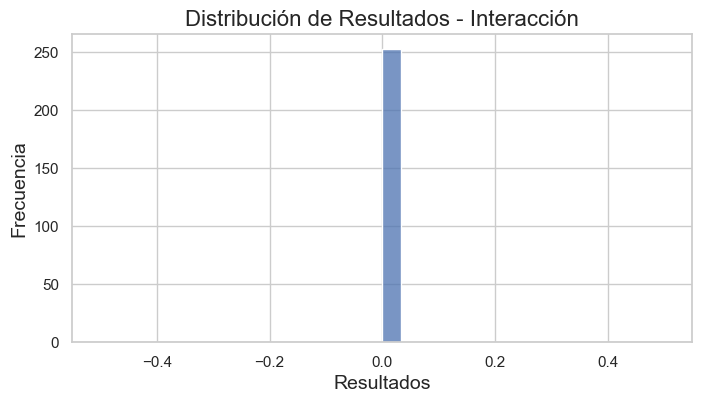

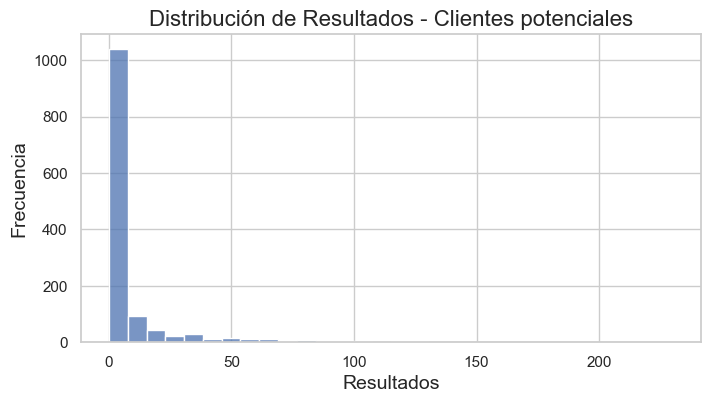

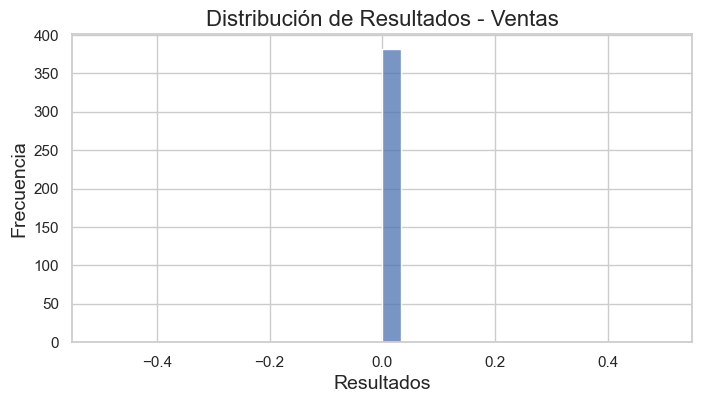

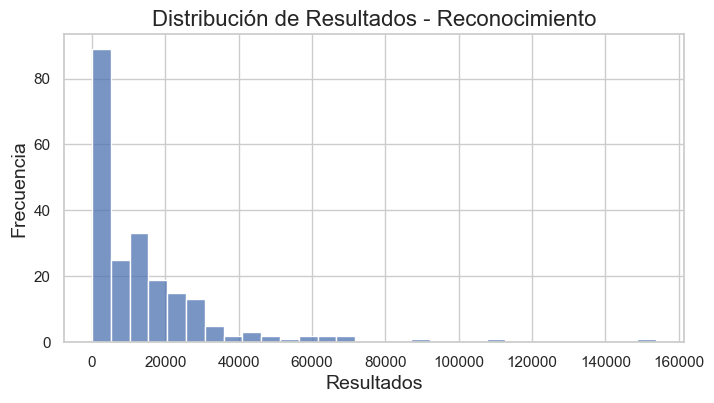

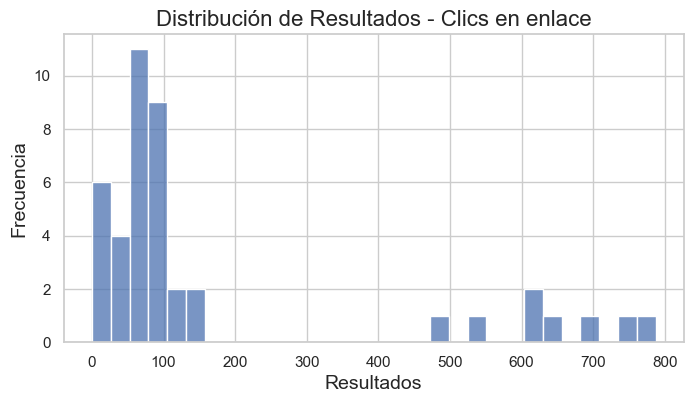

In [136]:
# =========================
# Distribución de Resultados por objetivo de campaña
# =========================

# Histograma de la variable 'Resultados' para cada dataset filtrado
for objetivo, df in dfs.items():
    plt.figure(figsize=(8,4))
    sns.histplot(df['Resultados'], bins=30, kde=False)
    plt.title(f"Distribución de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.ylabel("Frecuencia")
    plt.show()

Al analizar la variable **`Resultados`** segmentada por objetivo de campaña, se observan patrones de distribución distintos:

- **Clientes potenciales (OUTCOME_LEADS):**  
  La distribución es **sesgada positivamente (a la derecha)**, con la mayoría de anuncios generando entre 0 y 10 resultados.  
  Pocos anuncios alcanzan valores altos (cola larga hasta ~200).  
  Esto refleja la dinámica típica de campañas de prueba: se lanzan muchos anuncios, la mayoría rinde poco, y solo unos pocos concentran la mayor parte de las conversiones.  

- **Reconocimiento (OUTCOME_AWARENESS):**  
  También muestra una **distribución sesgada positivamente**, pero con una **escala mucho mayor**.  
  Algunos anuncios superan los **150.000 resultados**, lo cual es coherente con el objetivo de maximizar **alcance e impresiones**.  
  Existe una gran dispersión entre anuncios, lo que indica variabilidad significativa en su rendimiento.  

- **Clics en enlace (LINK_CLICKS):**  
  Aunque mantiene el sesgo positivo, la forma es distinta:  
  hay una **concentración de anuncios en un rango medio (50–150 clics)**, con algunos picos aislados de 500 a 800 clics.  
  Esto sugiere un comportamiento más homogéneo que en Leads o Reconocimiento, aunque todavía aparecen outliers.  

- **Interacción (OUTCOME_ENGAGEMENT) y Ventas (OUTCOME_SALES):**  
  Los histogramas aparecen prácticamente vacíos, lo que evidencia que **no existen resultados registrados en estas métricas**.  
  Aunque se mantienen en la exploración, en realidad no aportan información útil para el análisis.  

Se crea un nuevo diccionario excluyendo los objetivos de Interacción y ventas. Posteriormente se generan los boxplots de la variable resultado

### Boxplots de Resultados por objetivo de campaña

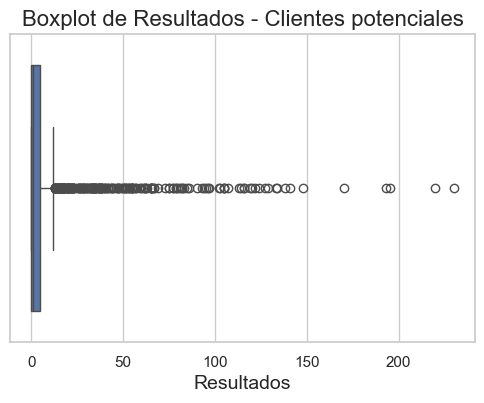

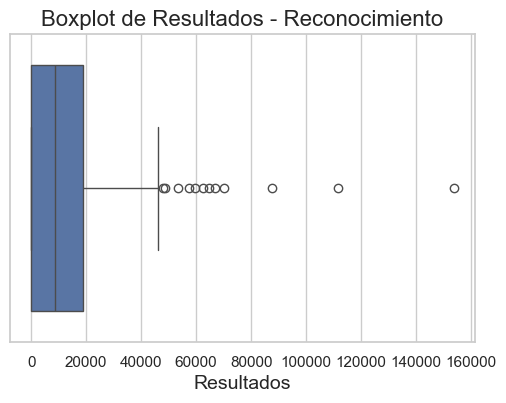

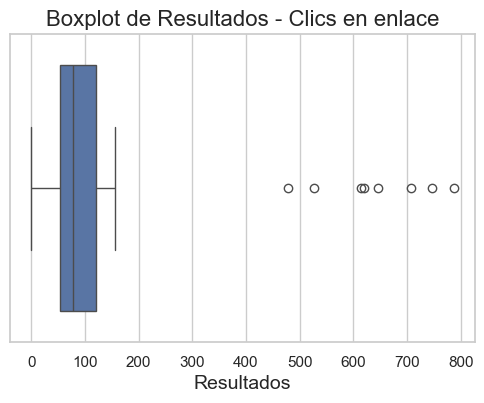

In [137]:
# =========================
# Boxplots de Resultados por objetivo de campaña
# =========================

# Crear un nuevo diccionario excluyendo Interacción y Ventas
dfs1 = {
    'Clientes potenciales': df_leads,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clicks
}

# Generar boxplots para la variable 'Resultados'
for objetivo, df in dfs1.items():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Resultados'])
    plt.title(f"Boxplot de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.show()


En los boxplots de la variable **`Resultados`** se observan patrones claros y diferenciados entre objetivos:

- **Leads (OUTCOME_LEADS):**  
  Es el objetivo con más anuncios. La mayoría generan menos de 10 leads, lo que se refleja en una mediana baja.  
  Sin embargo, existen algunos anuncios que superan los 200 leads, funcionando como outliers.  
  Esto confirma que este tipo de campañas requiere lanzar muchos anuncios, de los cuales solo unos pocos destacan.  

- **Reconocimiento (OUTCOME_AWARENESS):**  
  La escala de resultados es mucho mayor.  
  La mayoría de anuncios genera decenas de miles de impresiones, pero también aparecen outliers que superan los 100.000.  
  Este comportamiento es esperable porque se trata de un objetivo diseñado para maximizar alcance de forma masiva.  

- **Clics en enlace (LINK_CLICKS):**  
  Se ubica en un punto intermedio.  
  La mayoría de anuncios generan decenas de clics, aunque hay casos atípicos que llegan a varios cientos.  
  Esto muestra un comportamiento más estable que en leads o reconocimiento, aunque aún con algunos valores extremos.  

## Distribución de métricas de desempeño y costos por objetivo de campaña


Además de analizar la variable **`Resultados`**, es importante revisar cómo se comportan otras métricas
relacionadas con el desempeño y los costos de las campañas.

Las variables que analizo aquí son:

- **Importe gastado (COP):** inversión total en cada anuncio.  
- **Impresiones:** cantidad de veces que los anuncios fueron mostrados.  
- **Costo por resultado:** eficiencia de la inversión medida en función del objetivo.  
- **Clics en el enlace:** interacciones directas de los usuarios.  
- **CPC (costo por clic en el enlace):** cuánto cuesta, en promedio, que un usuario haga clic.  
- **CPM (costo por mil impresiones):** costo de mostrar el anuncio a mil personas.  
- **CTR (click-through rate):** proporción de clics respecto al número de impresiones.  

El objetivo de este análisis es comparar estas métricas entre los distintos tipos de campaña
(**Leads, Reconocimiento y Clics en enlace**) para identificar patrones de inversión, eficiencia y
posibles outliers.  

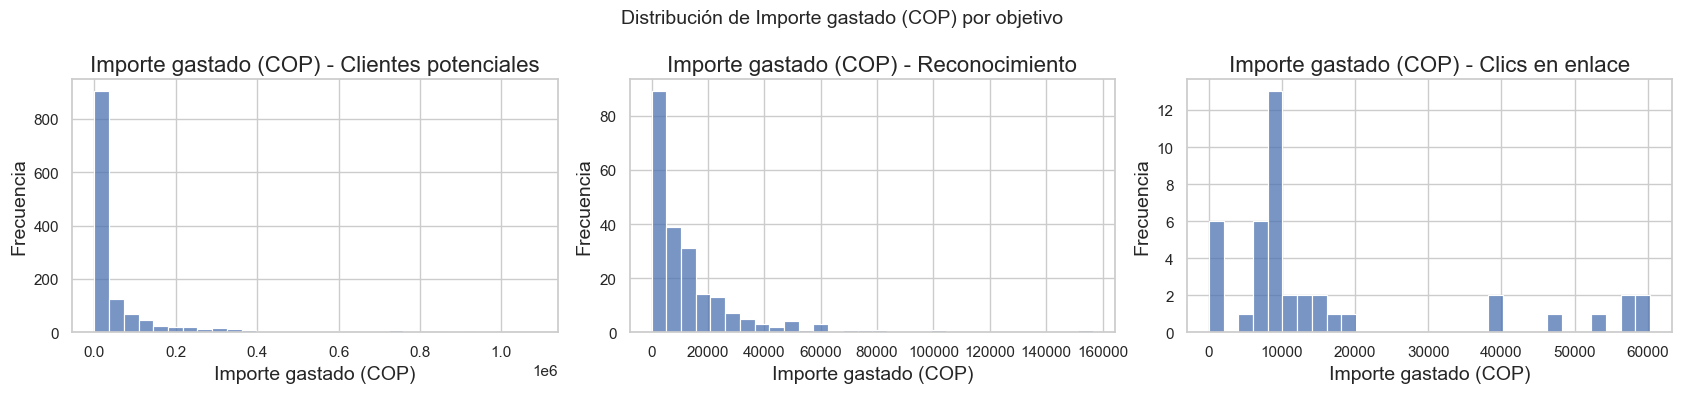

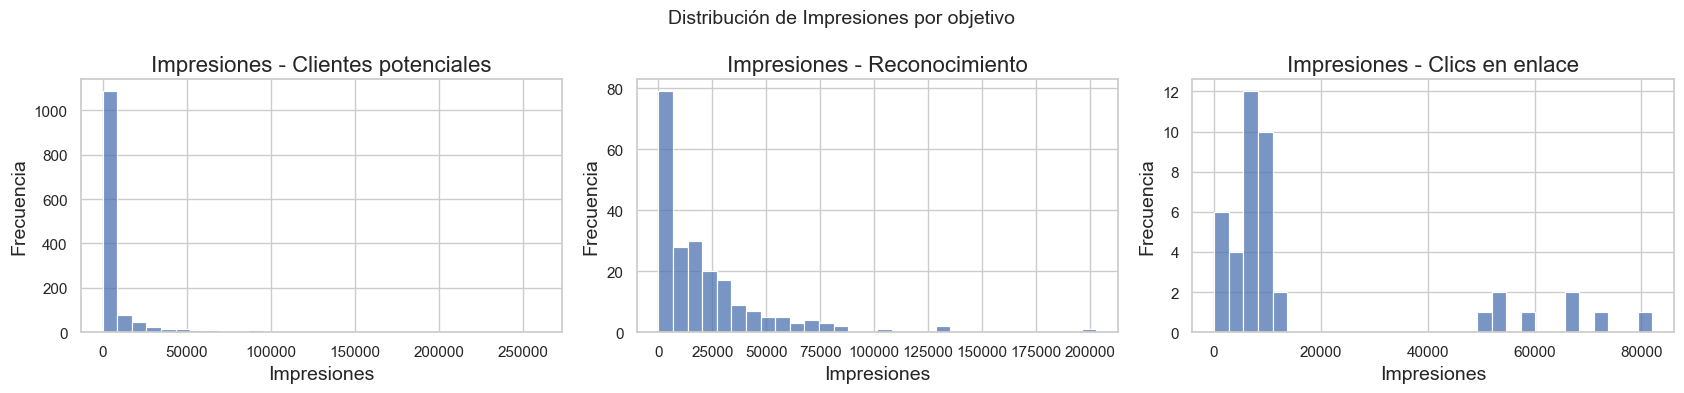

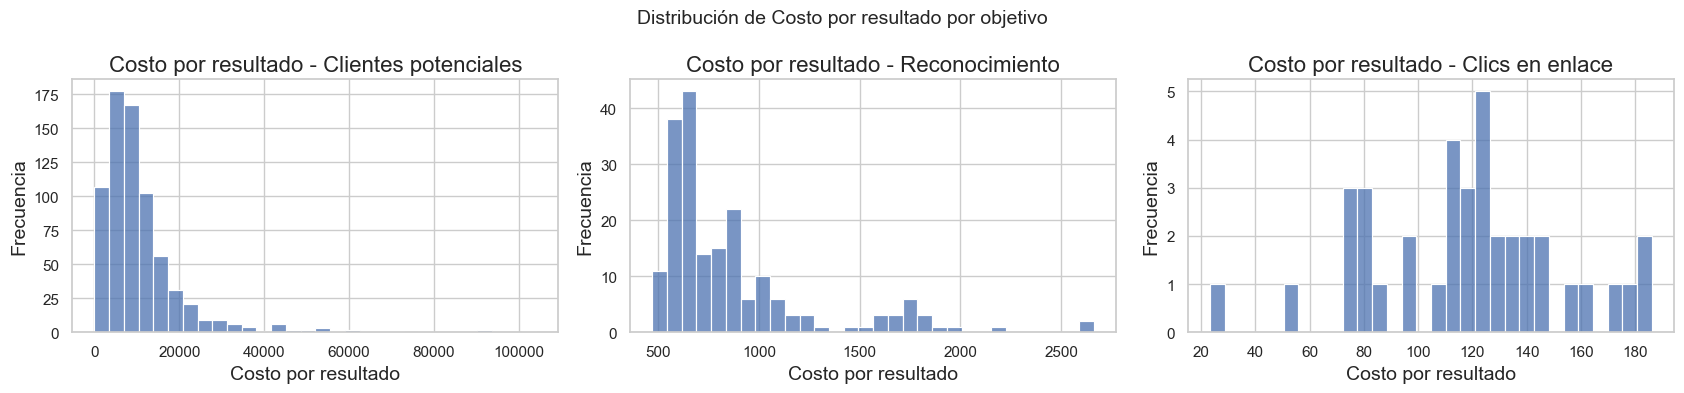

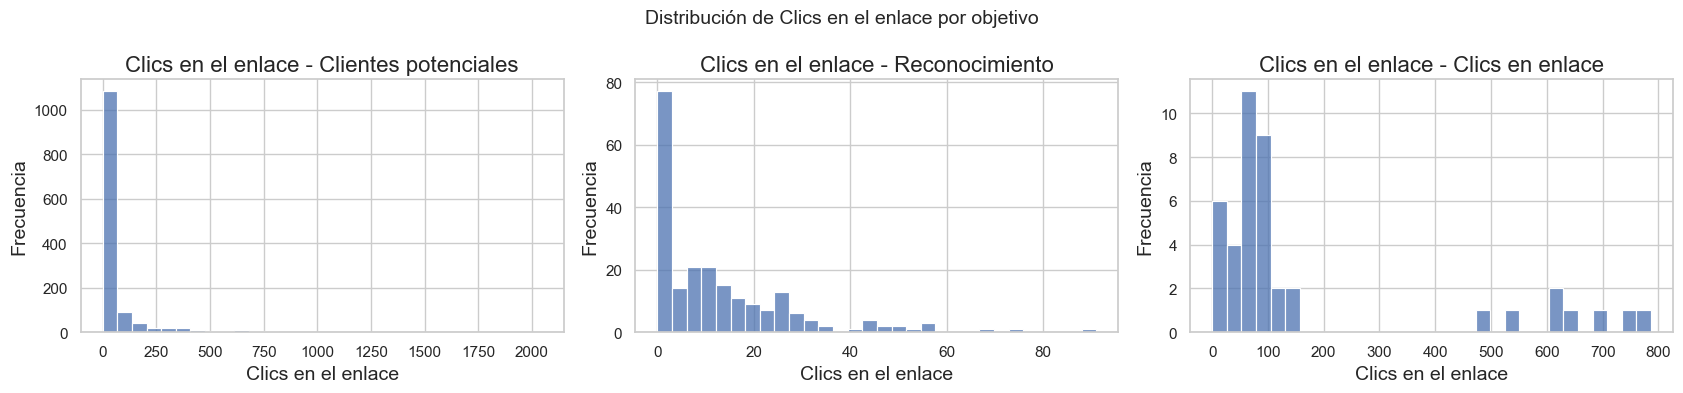

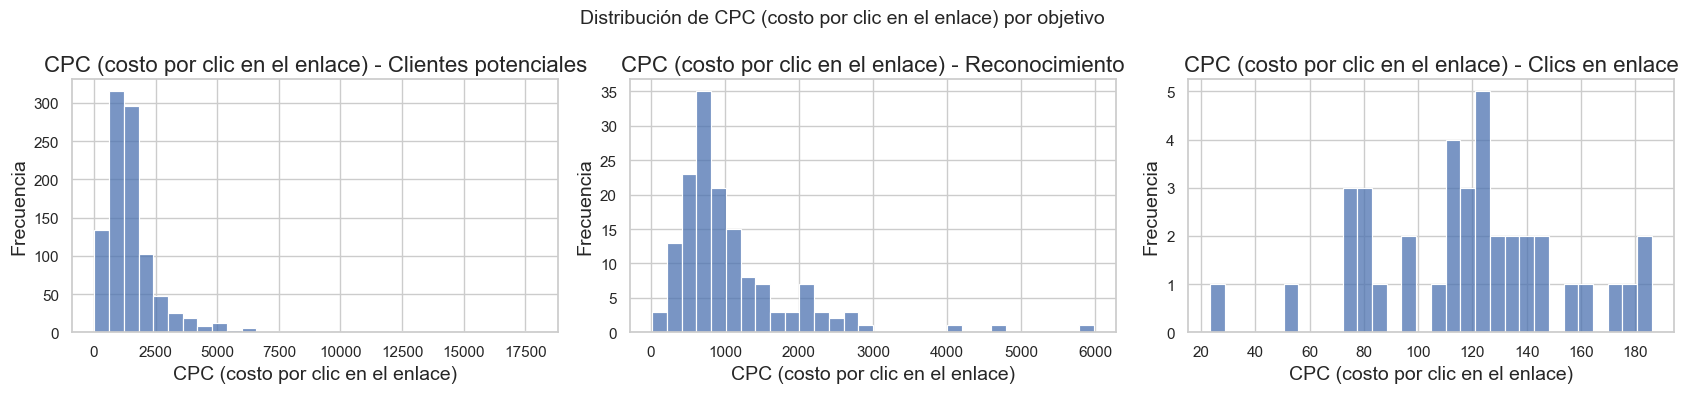

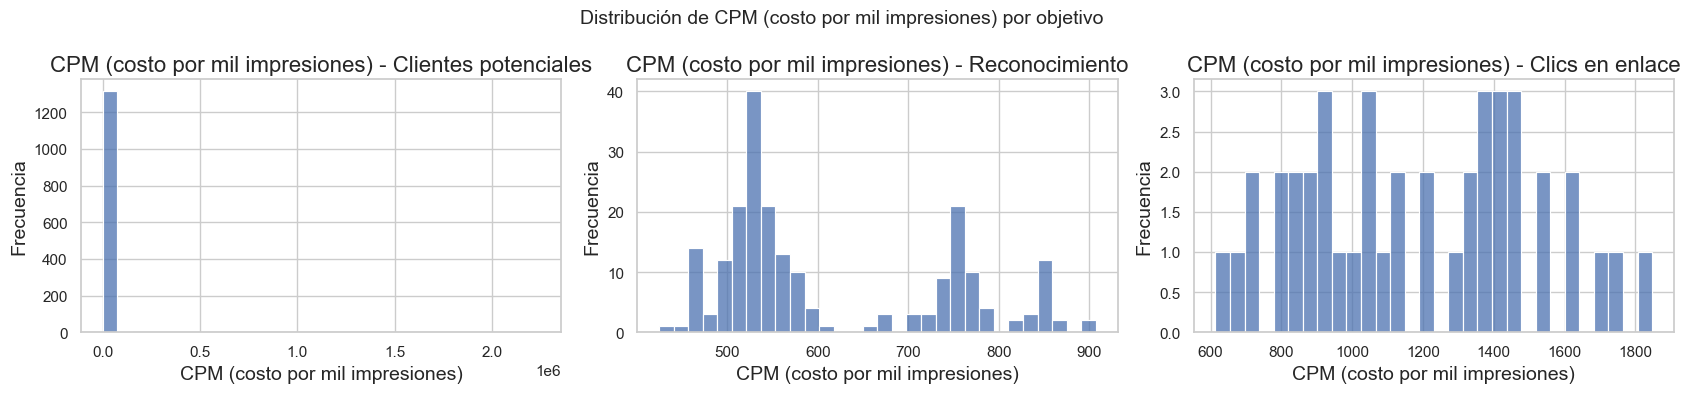

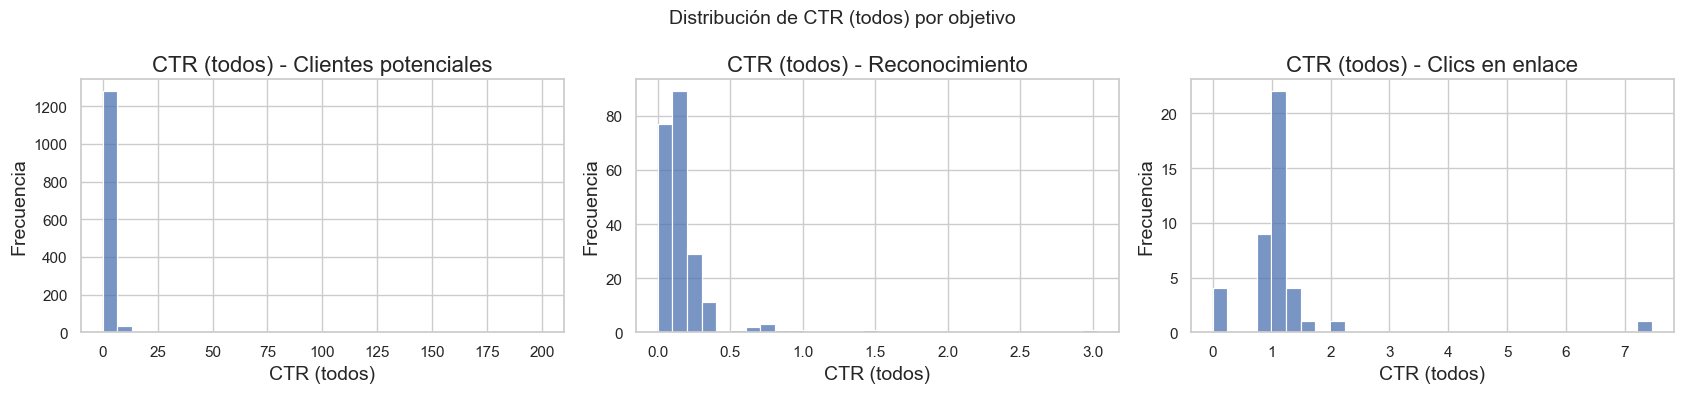

In [118]:
# =========================
# Distribución de métricas de desempeño y costos
# =========================

vars_numericas = [
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]

# Graficar histograma de cada variable por objetivo de campaña
for var in vars_numericas:
    fig, axes = plt.subplots(1, 3, figsize=(17,4))
    for i, (objetivo, df) in enumerate(dfs1.items()):
        sns.histplot(df[var], bins=30, kde=False, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frecuencia")
    plt.suptitle(f"Distribución de {var} por objetivo", fontsize=14)
    plt.tight_layout()
    plt.show()

### Conclusiones sobre métricas de desempeño y costos

En el análisis de las métricas de costo (**Costo por resultado, CPC y CPM**) se observa que todas presentan
**distribuciones sesgadas positivamente**, con la mayoría de los anuncios concentrados en valores bajos y
algunos outliers con costos muy elevados.

Al segmentar por objetivo de campaña aparecen diferencias claras:

- **Clientes potenciales (Leads):**  
  Los costos son los más altos, ya que captar un lead es mucho más complejo que mostrar un anuncio
  o lograr un clic.  
  En algunos casos el costo por lead supera los **50.000 COP**.

- **Reconocimiento y Clics en enlace:**  
  Presentan costos más bajos. Mostrar un anuncio a una audiencia amplia o lograr un clic es
  considerablemente más barato que obtener leads o ventas.  

## Distribución de variables categóricas por objetivo de campaña

En esta sección analizo cómo se distribuyen las variables categóricas del dataset (**Objetivo, Edad, Sexo,
Llamada a la acción, Tipo de resultado y Mes**) segmentadas por cada tipo de campaña.

El objetivo es identificar patrones de configuración y comportamiento que complementen el análisis de las
variables numéricas y permitan entender mejor la lógica detrás de la segmentación de las campañas.

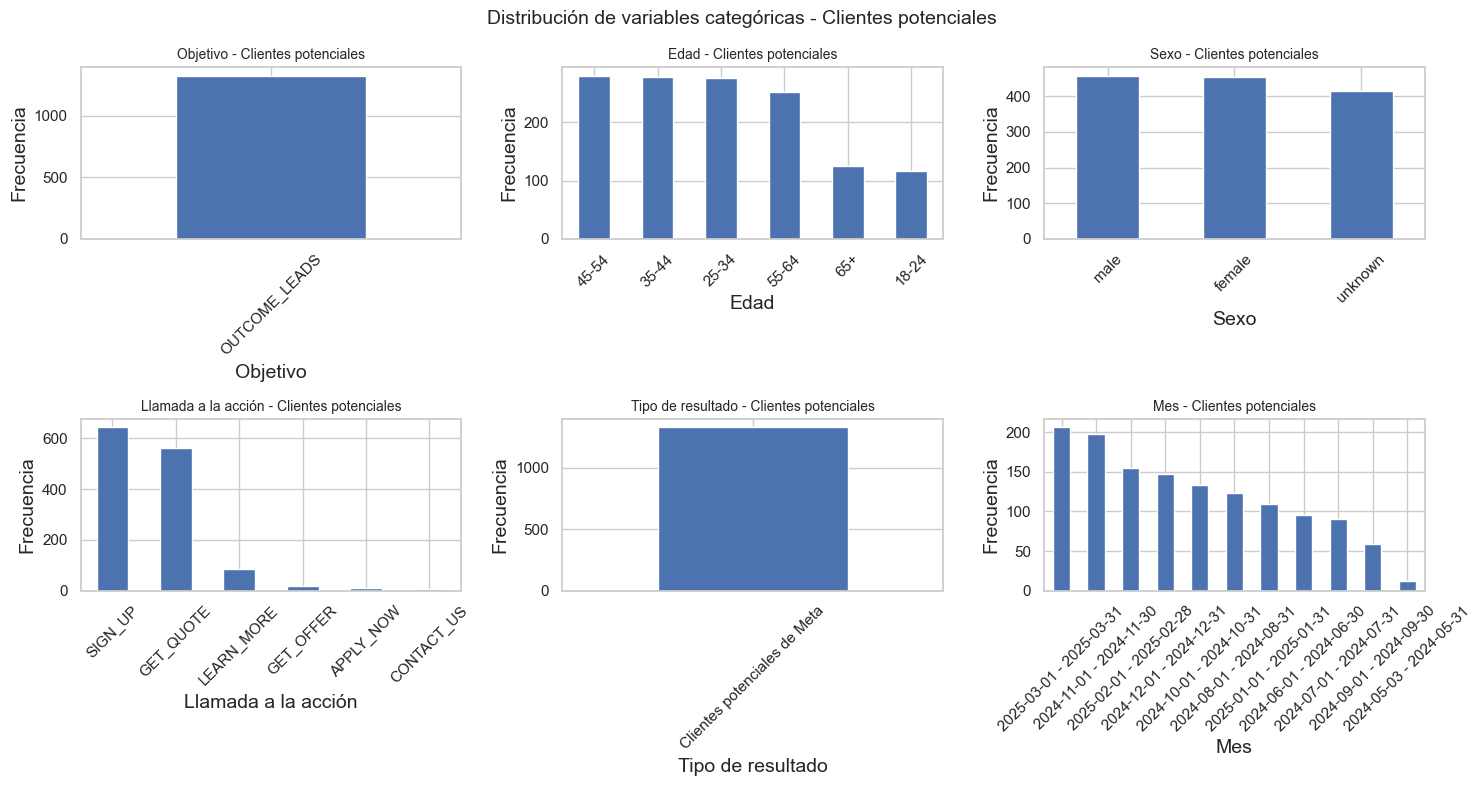

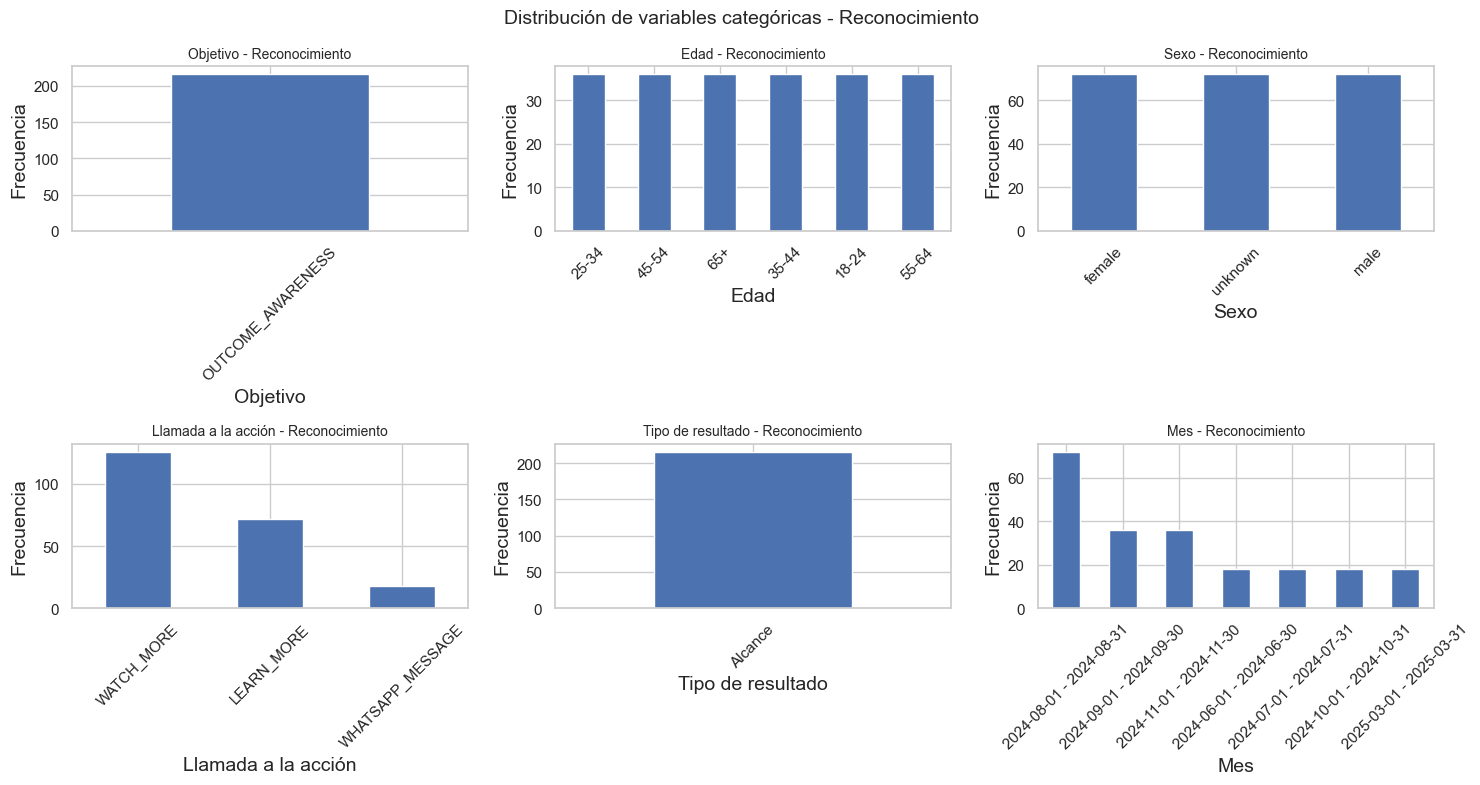

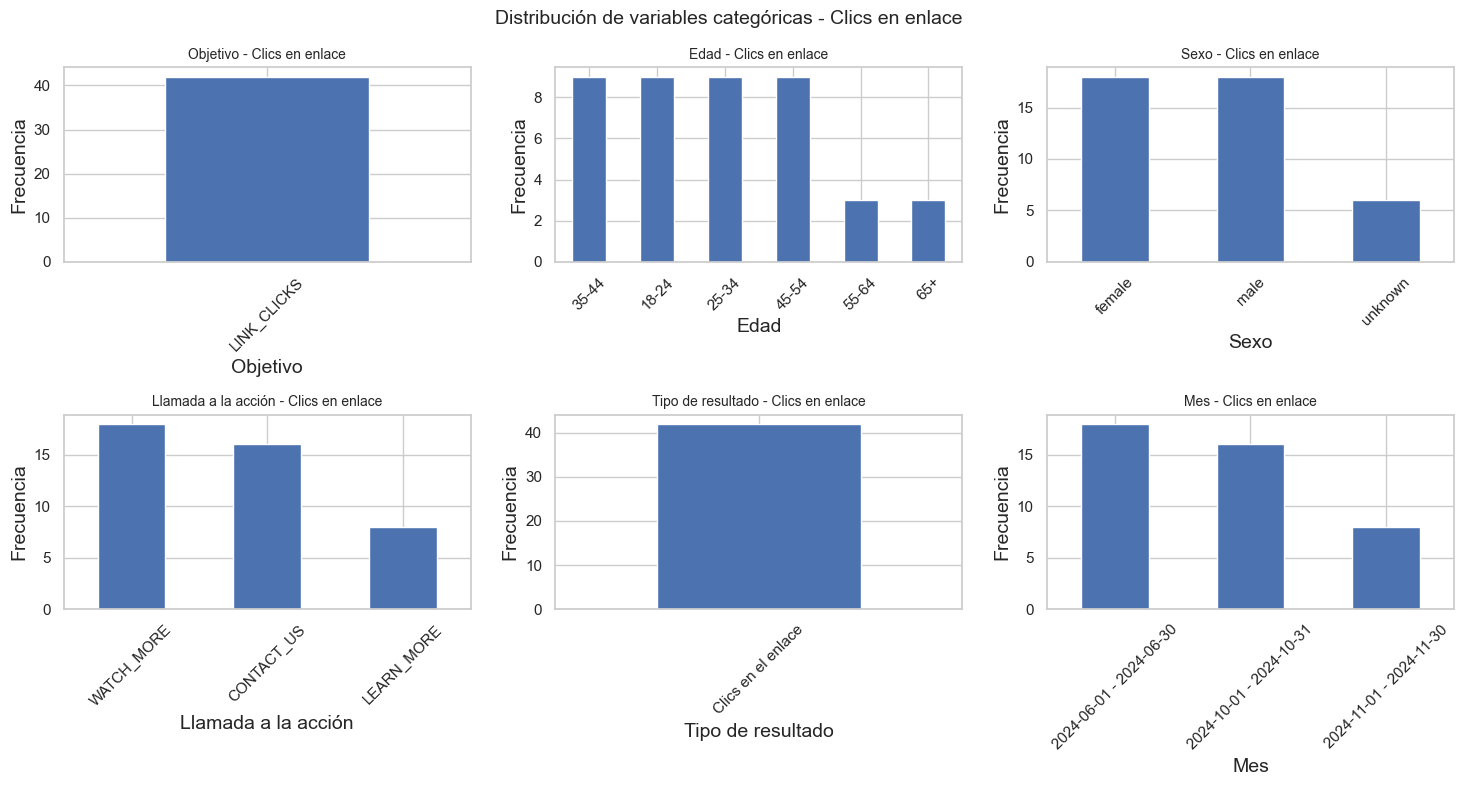

In [139]:
# =========================
# Distribución de variables categóricas
# =========================

cols_cat = ['Objetivo', 'Edad', 'Sexo', 'Llamada a la acción', 'Tipo de resultado', 'Mes']

for objetivo, df in dfs1.items():
    n_cols = 3
    n_rows = (len(cols_cat) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols_cat):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}", fontsize=10)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)

    # eliminar ejes vacíos en caso de que sobren
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Distribución de variables categóricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

### Análisis univariado de variables categóricas

Al analizar las variables categóricas segmentadas por objetivo de campaña, se observan los siguientes hallazgos:

- **Objetivo y Tipo de resultado**  
  - La gran mayoría de anuncios está enfocada en **Clientes potenciales (Leads)**, lo cual es coherente con el sector inmobiliario, donde el principal interés es captar registros de usuarios interesados.  
  - Los objetivos de **Reconocimiento** y **Clics en enlace** tienen menor participación.  
  - Aunque también aparecen anuncios con objetivos de **Ventas** e **Interacción**, previamente se evidenció que no generaron resultados, por lo cual su aporte es nulo.  
  - Existe proporcionalidad directa entre el *Objetivo* y el *Tipo de resultado*, ya que ambos reflejan la misma lógica de configuración de campañas.

- **Edad**  
  - La pauta se concentra mayoritariamente en el rango de **25 a 54 años**, que corresponde al segmento objetivo más común en la compra de vivienda.  
  - Los extremos (18–24 y 65+) tienen presencia menor, lo cual refleja que se priorizan segmentos económicamente más activos.

- **Sexo**  
  - La distribución entre **hombres y mujeres** es bastante equilibrada.  
  - Aparece un valor “**unknown**” con una proporción considerable, lo que indica que Meta Ads no siempre logra asignar el género de los usuarios alcanzados o que algunas campañas se configuraron sin restricción de sexo. Este hallazgo debe documentarse, ya que puede generar sesgos en futuros modelos.

- **Llamada a la acción (CTA)**  
  - En campañas de **Leads**, predominan las acciones **SIGN_UP**, **GET_QUOTE** y **WHATSAPP_MESSAGE**, todas orientadas a captación de clientes.  
  - En **Reconocimiento** y **Clics en enlace**, se destacan CTAs como **WATCH_MORE** y **LEARN_MORE**, más vinculadas al consumo de contenido que a la conversión.  
  - Este patrón evidencia que el uso de las llamadas a la acción está alineado con el objetivo principal de cada campaña.

- **Mes**  
  - Los anuncios se distribuyen en distintos periodos desde 2024 hasta 2025, aunque con cierta irregularidad.  
  - Un hallazgo importante es que, tras filtrar los objetivos de Ventas e Interacción, la última fecha con anuncios activos corresponde a **marzo de 2025**, a pesar de que el archivo fue exportado en agosto de 2025.  
  - Esto genera una inconsistencia, pues en la práctica sí existían campañas de Leads activas después de marzo 2025. El comportamiento puede deberse a un error en la exportación de Meta Ads o a la forma en que se asignan las fechas a cada anuncio.  

## Análisis Bivariado y correlaciones entre variables

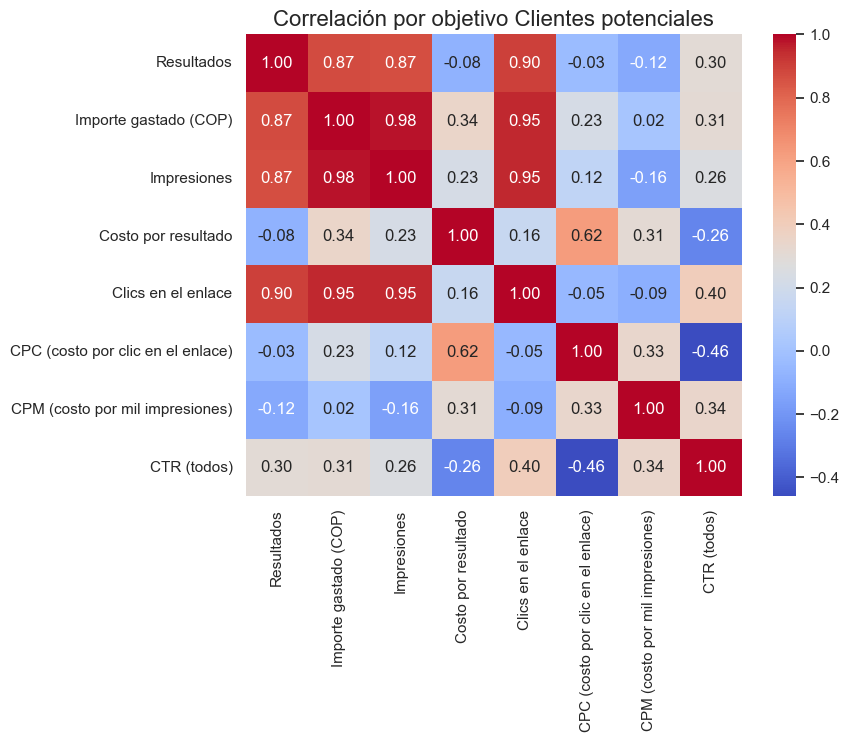

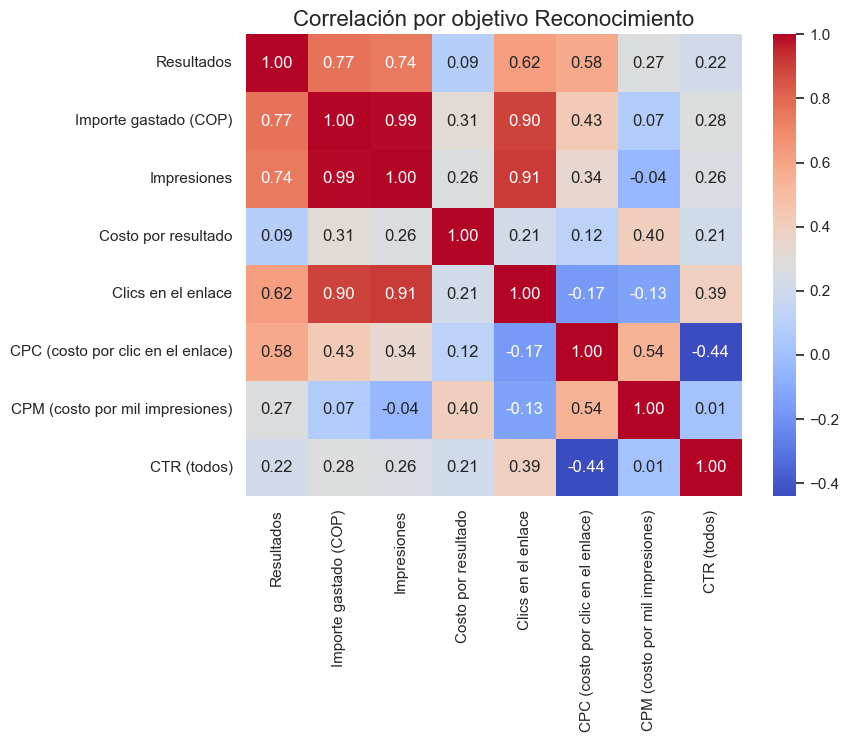

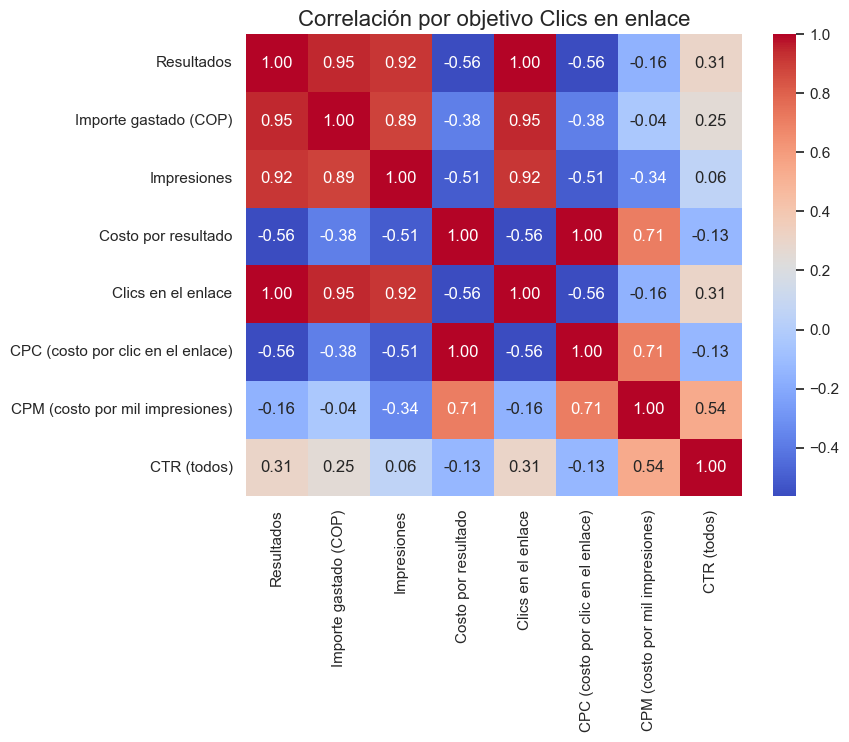

In [138]:
# =========================
# Análisis bivariado y correlaciones
# =========================

vars_numericas1 = [
    'Resultados',
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]

# Mapa de calor de correlaciones por objetivo
for objetivo, df in dfs1.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(df[vars_numericas1].corr(method="spearman"), 
                annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlación por objetivo {objetivo}")
    plt.show()

## Análisis de correlaciones por objetivo
1. Clientes potenciales (Leads)  
- **Variables más relacionadas con Resultados:**
  - Importe gastado (0.87)
  - Impresiones (0.87)
  - Clics en el enlace (0.90)  
- **Variables poco relacionadas:**
  - Costo por resultado (-0.08)  
- **Observación clave:**  
  Existe **multicolinealidad muy alta** entre *importe gastado*, *impresiones* y *clics en el enlace* (correlaciones >0.95), por lo que aportan información redundante.

2. Reconocimiento  
- **Variables más relacionadas con Resultados:**
  - Importe gastado (0.77)
  - Impresiones (0.74)
  - Clics en el enlace (0.62)  
- **Variables poco relacionadas:**
  - CTR (0.22)
  - CPM (0.27)  
- **Observación clave:**  
  Las correlaciones son más moderadas que en leads. Las métricas de eficiencia (CTR, CPM) no explican directamente los resultados.


3. Clics en el enlace  
- **Variables más relacionadas con Resultados:**
  - Clics en el enlace (1.00)
  - Importe gastado (0.95)
  - Impresiones (0.92)  
- **Variables poco relacionadas:**
  - CPM (-0.16)
  - CTR (0.31)  
- **Observación clave:**  
  El **costo por resultado** tiene correlación negativa fuerte (-0.56): a más clics, menor costo unitario.  
  El CPM y CPC están positivamente correlacionados entre sí (0.71), reflejando consistencia en costos.

## Relación entre variables categóricas y Resultados (Test de Kruskal-Wallis)

Para evaluar si las variables categóricas tienen una relación estadísticamente significativa con la variable 
**`Resultados`**, apliqué la prueba no paramétrica de **Kruskal-Wallis**.  
Este test permite comparar las distribuciones de resultados entre diferentes grupos dentro de cada variable.

In [121]:
# =========================
# Test de Kruskal-Wallis
# =========================
kruskal_results = []

for objetivo, df in dfs1.items():
    for col in cols_cat:
        
        grupos = [df[df[col] == categoria]['Resultados'].dropna() 
                  for categoria in df[col].unique()]

        
        if len([g for g in grupos if len(g) > 0]) > 1:
            stat, p = kruskal(*grupos)
            kruskal_results.append([objetivo, col, stat, p])
        else:
            kruskal_results.append([objetivo, col, None, None])

kruskal_df = pd.DataFrame(kruskal_results, 
                          columns=['Objetivo', 'Variable', 'H', 'p-value'])

kruskal_df = kruskal_df.sort_values(by=['Objetivo', 'p-value'])
kruskal_df

,Objetivo,Variable,H,p-value
17,Clics en enlace,Mes,19.007773,7.456148e-05
14,Clics en enlace,Sexo,15.419088,4.485260e-04
15,Clics en enlace,Llamada a la acción,4.473457,1.068074e-01
13,Clics en enlace,Edad,0.825191,9.753989e-01
12,Clics en enlace,Objetivo,NaN,NaN
16,Clics en enlace,Tipo de resultado,NaN,NaN
2,Clientes potenciales,Sexo,355.806496,5.465139e-78
1,Clientes potenciales,Edad,83.068009,1.912356e-16
5,Clientes potenciales,Mes,53.055322,7.271875e-08
3,Clientes potenciales,Llamada a la acción,39.993982,1.497547e-07



### Principales hallazgos

- **Clientes potenciales (Leads):**
  - La variable **Sexo** muestra una relación significativa (p < 0.001). Esto indica que los resultados varían
    según el género al que se dirigen los anuncios.  
  - **Edad** y **Llamada a la acción (CTA)** también tienen asociación significativa, lo cual refleja que
    ciertos rangos de edad y ciertos CTA generan más leads que otros.  
  - La variable **Mes** también resulta significativa, mostrando variaciones temporales en el rendimiento de las campañas.

- **Reconocimiento:**
  - **Sexo** y **Llamada a la acción** aparecen como variables significativas (p < 0.001), lo que confirma
    que estas categorías influyen en el alcance obtenido.  
  - El **Mes** también tiene relación con los resultados, lo que evidencia un comportamiento temporal.

- **Clics en enlace:**
  - **Sexo** y **Mes** son las variables con mayor nivel de significancia, lo que indica que tanto el género
    del público como la temporalidad afectan el número de clics conseguidos.  
  - **Llamada a la acción (CTA)** también tiene relación, aunque en menor medida.  


## Selección de variables por objetivo

En esta etapa seleccioné manualmente las variables que considero relevantes para cada tipo de objetivo
(**Leads, Reconocimiento y Clics en enlace**).  

La selección incluye tanto variables numéricas (como inversión, impresiones, clics) como categóricas 
(edad, sexo, mes, llamada a la acción).  

Un punto importante es que, aunque se identificó **multicolinealidad alta** entre algunas de las variables 
(numéricas como *importe gastado, impresiones y clics en el enlace*), decidí mantenerlas en el análisis.  

### ¿Por qué mantener variables con multicolinealidad?
- Estas variables, aunque correlacionadas, representan **dimensiones clave del desempeño de campañas** 
  que no deben descartarse sin más, ya que cada una aporta un ángulo distinto:  
  - *Importe gastado* refleja la inversión directa.  
  - *Impresiones* capturan el alcance.  
  - *Clics en el enlace* muestran la interacción real de los usuarios.  
- El hecho de que estén fuertemente relacionadas no significa que sean irrelevantes; 
  simplemente aportan información redundante que puede afectar modelos lineales sin regularización.  

### Tratamiento de la multicolinealidad
En lugar de eliminarlas, se les dará un tratamiento mediante **técnicas de regularización** 
(como Ridge, Lasso o Elastic Net).  
Estas técnicas penalizan los coeficientes de las variables altamente correlacionadas, 
permitiendo que el modelo mantenga todas las variables pero reduciendo el peso de las redundantes.  

De esta manera, se asegura que:
1. **Ninguna variable clave se pierde** en el análisis.  
2. Se controla el efecto de la multicolinealidad para evitar problemas de sobreajuste.  
3. El modelo final puede ser más interpretable y robusto.  

In [140]:
# =========================
# Selección de variables por objetivo de campaña
# =========================
vars_por_objetivo = {
    "Clientes potenciales": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Edad",     
            "Mes",      
            "Llamada a la acción"  
        ]
    },

    "Reconocimiento": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Llamada a la acción", 
            "Mes",      
            "Edad"      
        ]
    },

    "Clics en enlace": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace", 
        ],
        "categoricas": [
            "Mes",     
            "Sexo",     
        ]
    }
}

## Relación entre variables numéricas y Resultados

En esta sección analizo la relación entre las variables numéricas seleccionadas y la variable 
**Resultados**, utilizando diagramas de dispersión.  
El objetivo es observar patrones de dependencia y validar si estas métricas explican el desempeño 
de las campañas publicitarias.

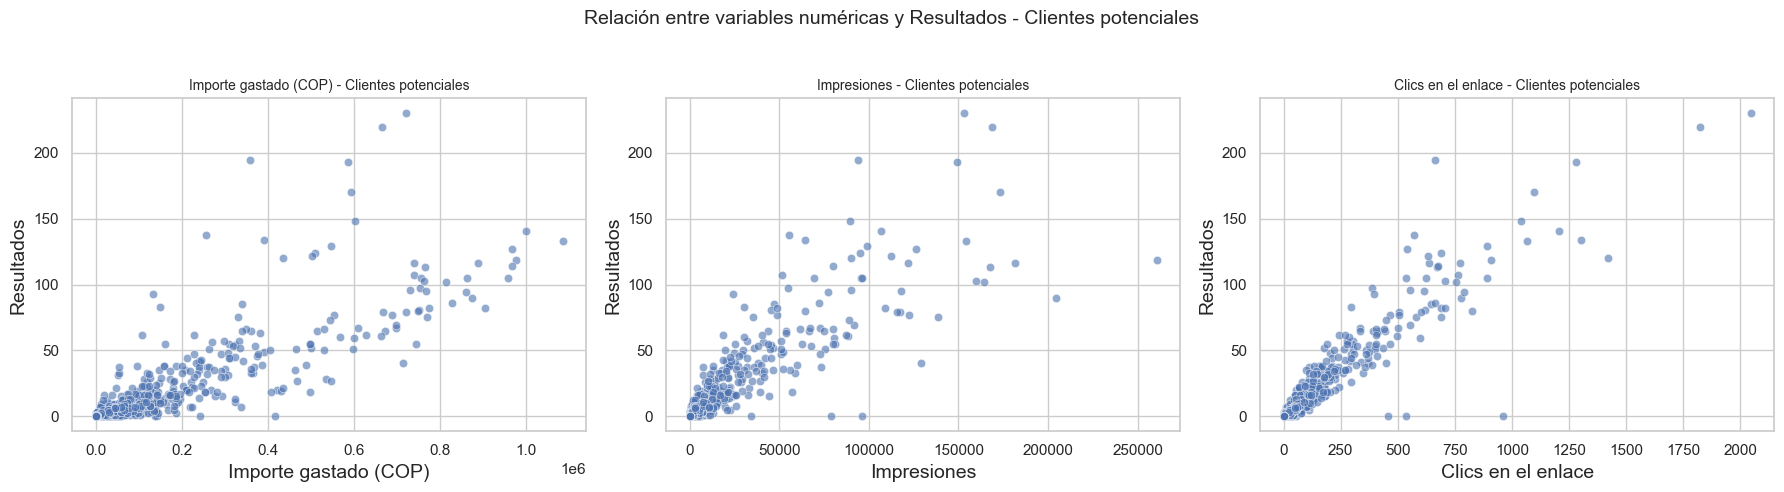

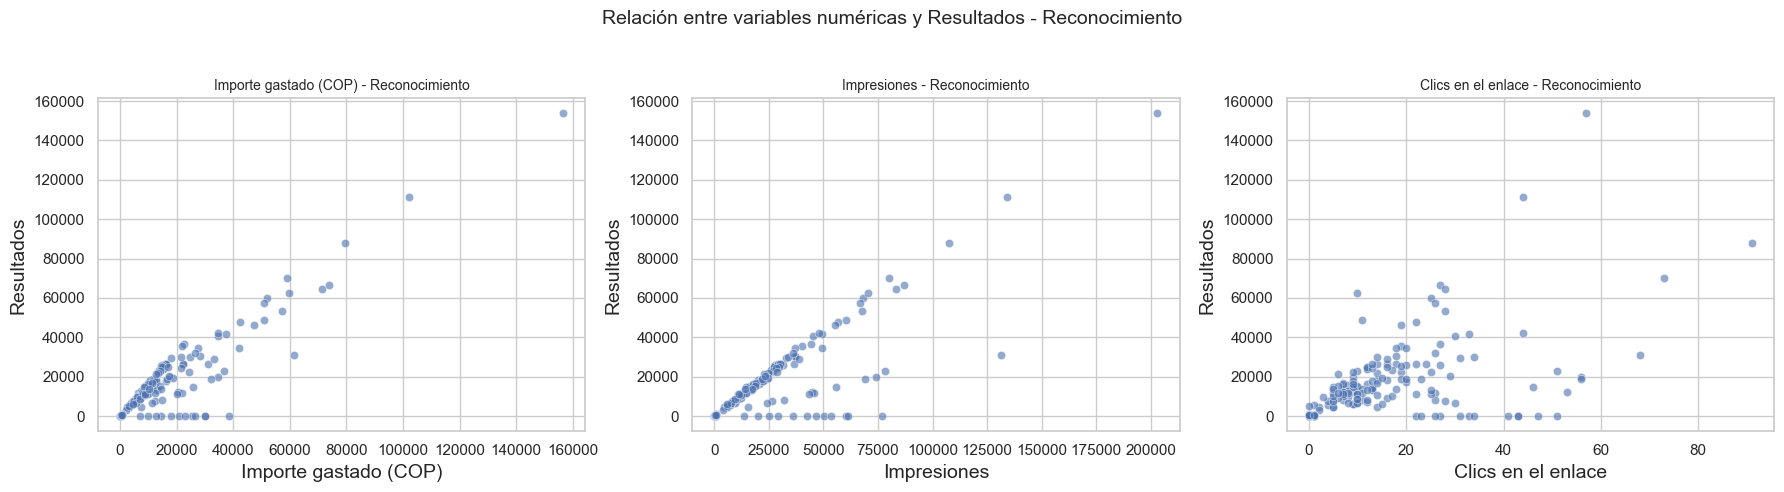

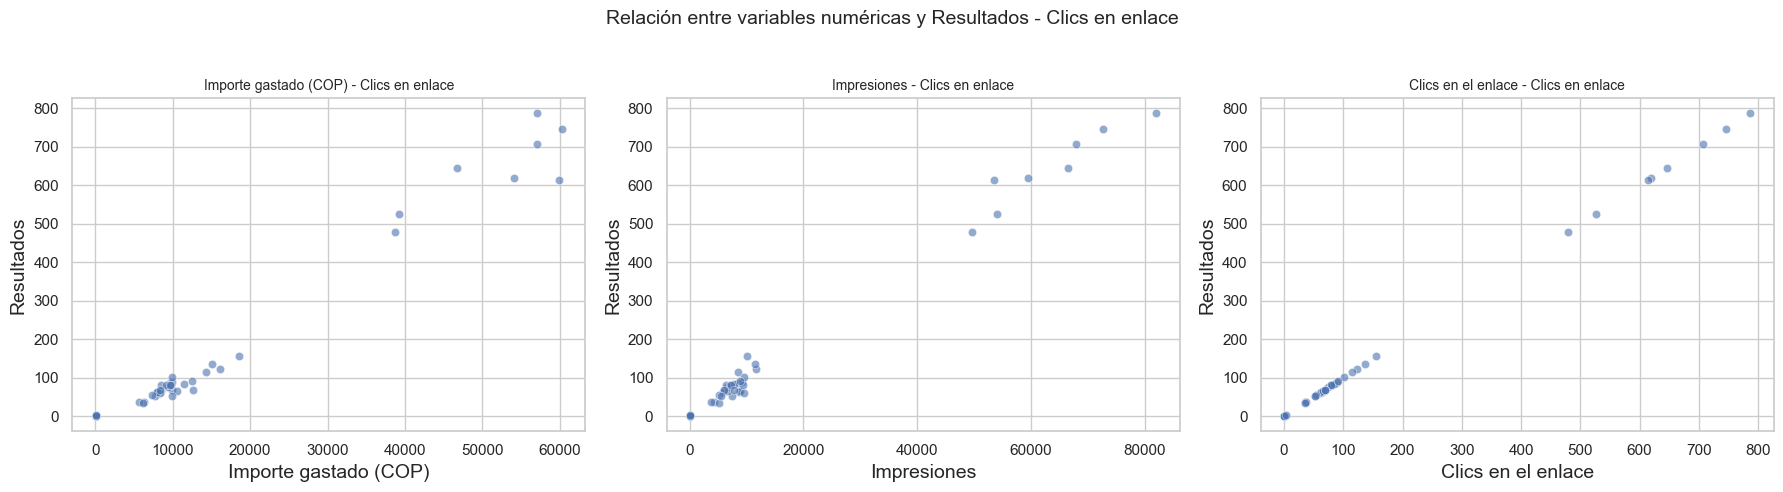

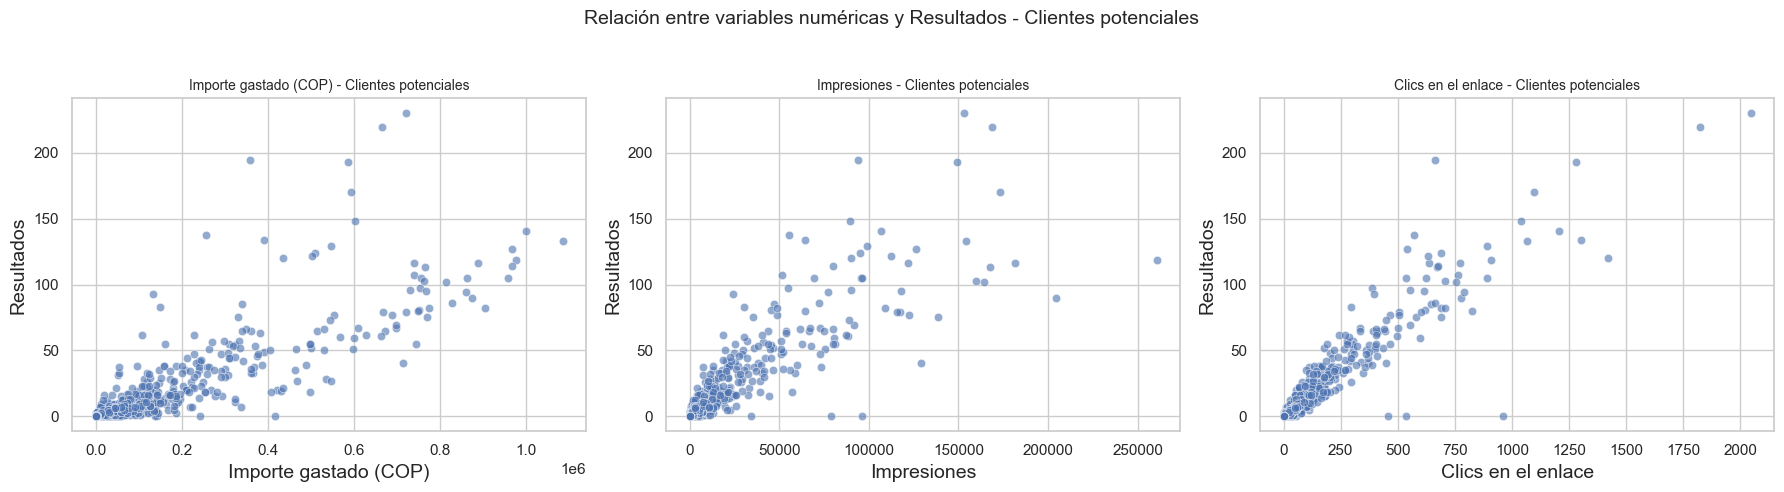

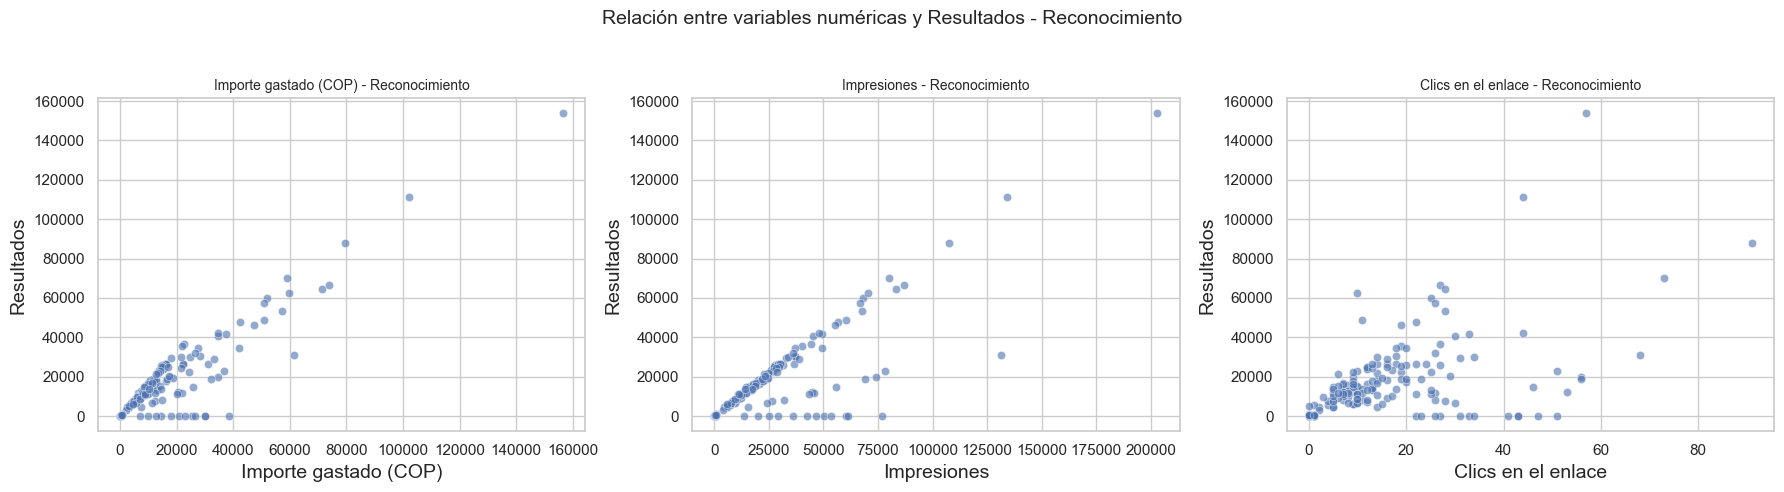

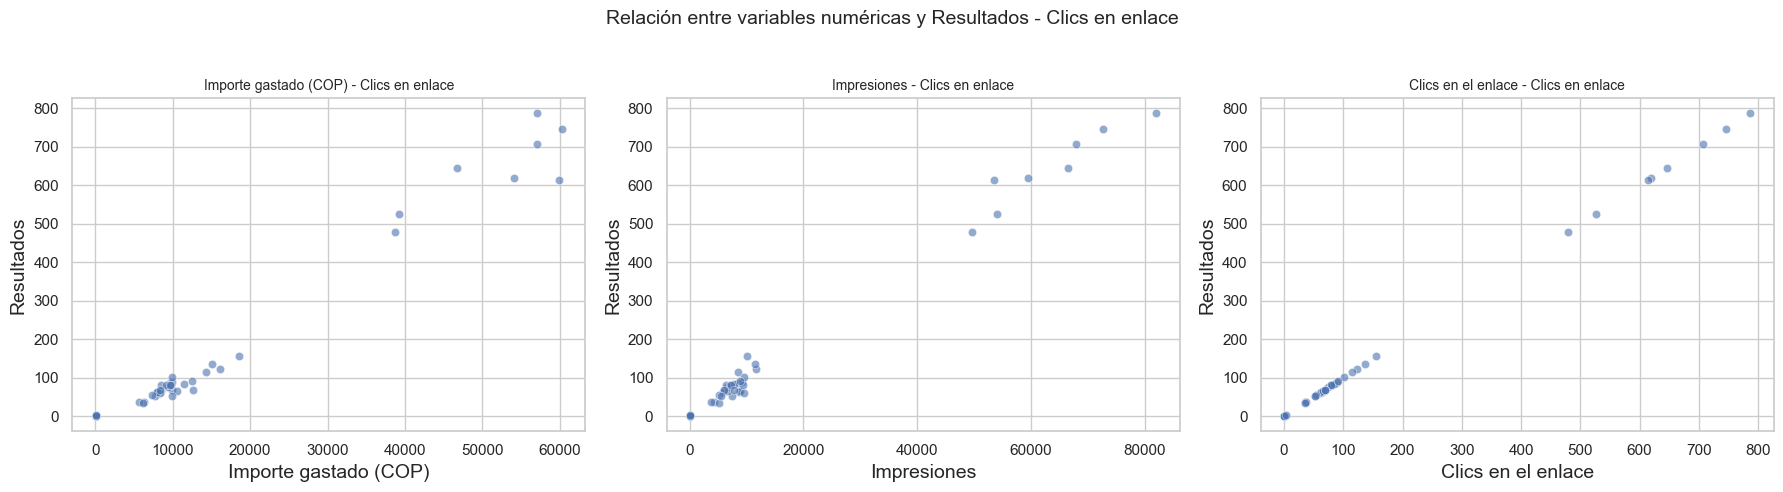

In [141]:
# ================================
# Relación entre variables numéricas y Resultados
# ================================

for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]

    # Definir número de variables numéricas
    num_vars = vars_dict["numericas"]
    n = len(num_vars)

    # Crear subplots dinámicos
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

    for i, var in enumerate(num_vars):
        sns.scatterplot(x=df[var], y=df["Resultados"], alpha=0.6, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}", fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Resultados")

    fig.suptitle(f"Relación entre variables numéricas y Resultados - {objetivo}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]
    
    # Definir número de variables numéricas
    num_vars = vars_dict["numericas"]
    n = len(num_vars)
    
    # Crear subplots (1 fila, n columnas)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    
    for i, var in enumerate(num_vars):
        sns.scatterplot(x=df[var], y=df["Resultados"], alpha=0.6, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}", fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Resultados")
    
    fig.suptitle(f"Relación entre variables numéricas y Resultados - {objetivo}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Conclusiones del análisis bivariado de variables numéricas y Resultados

Al evaluar la relación entre las variables numéricas y la variable **Resultados** mediante 
diagramas de dispersión, se confirman varios hallazgos importantes:

- En los tres objetivos principales (**Clientes potenciales, Reconocimiento y Clics en enlace**) 
  se observa una **relación positiva fuerte** entre la inversión (*Importe gastado*), 
  el alcance (*Impresiones*), la interacción (*Clics en el enlace*) y los resultados obtenidos.  
  Esto significa que, a mayor inversión y exposición, mayor es la probabilidad de generar resultados.

- Los gráficos muestran una **tendencia casi lineal**, lo que valida que estas variables 
  son los principales impulsores del rendimiento en campañas digitales.  
  Sin embargo, también aparecen **outliers**: anuncios que, con niveles similares de inversión 
  o impresiones, obtienen resultados muy por encima o por debajo de lo esperado.  
  Estos casos son clave para identificar campañas altamente efectivas o ineficientes.

- El patrón es **consistente en todos los objetivos**, aunque la magnitud varía:
  - En *Clientes potenciales*, los resultados suelen ser bajos en volumen, pero el costo por cada lead es alto.  
  - En *Reconocimiento*, la escala es mucho mayor, con decenas de miles de impresiones y un rendimiento más estable.  
  - En *Clics en enlace*, se aprecia una correlación casi perfecta entre clics y resultados, lo cual tiene sentido dado que el resultado está directamente definido por esa métrica.

## Análisis bivariado de variables categóricas y Resultados

===== Clientes potenciales =====


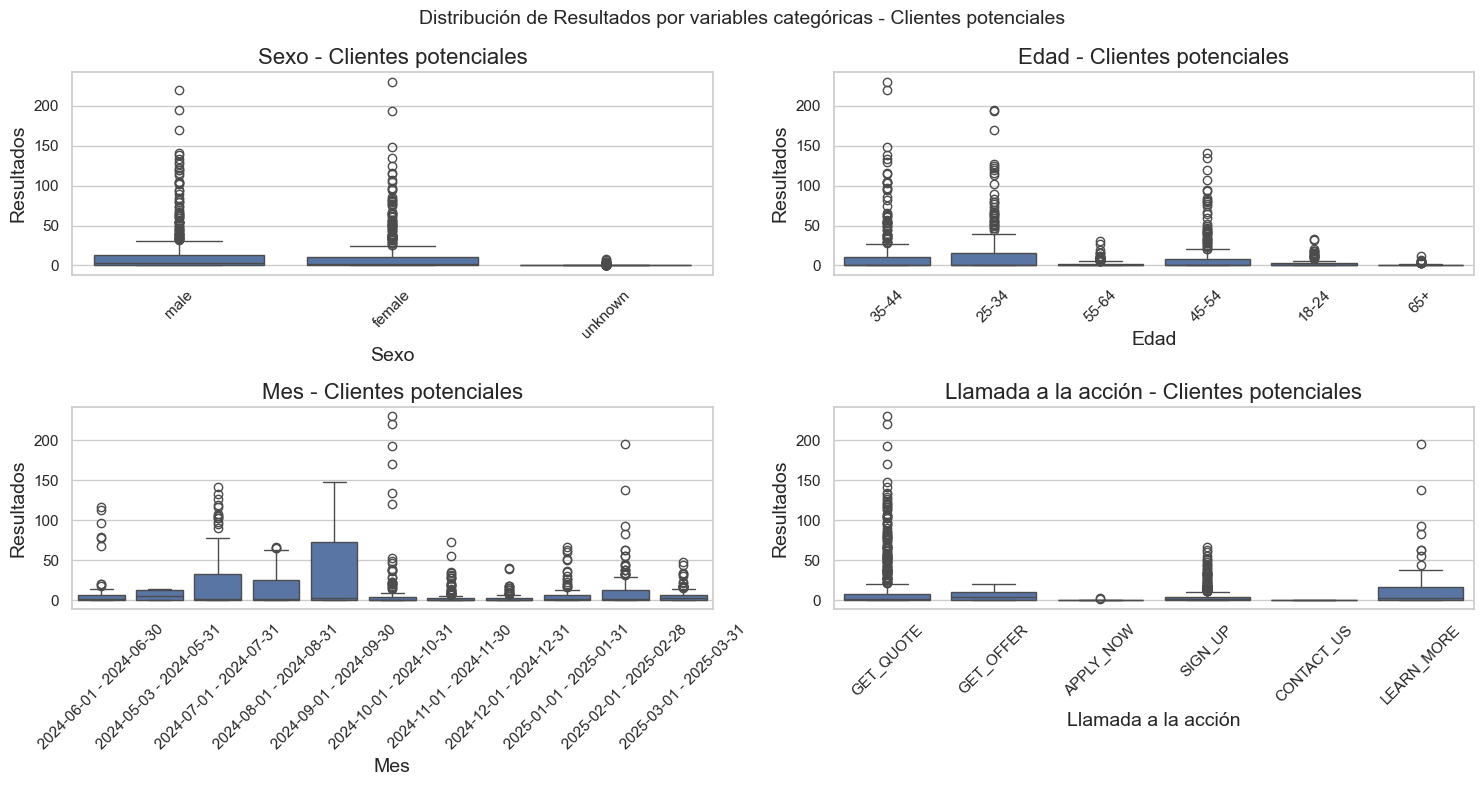

===== Reconocimiento =====


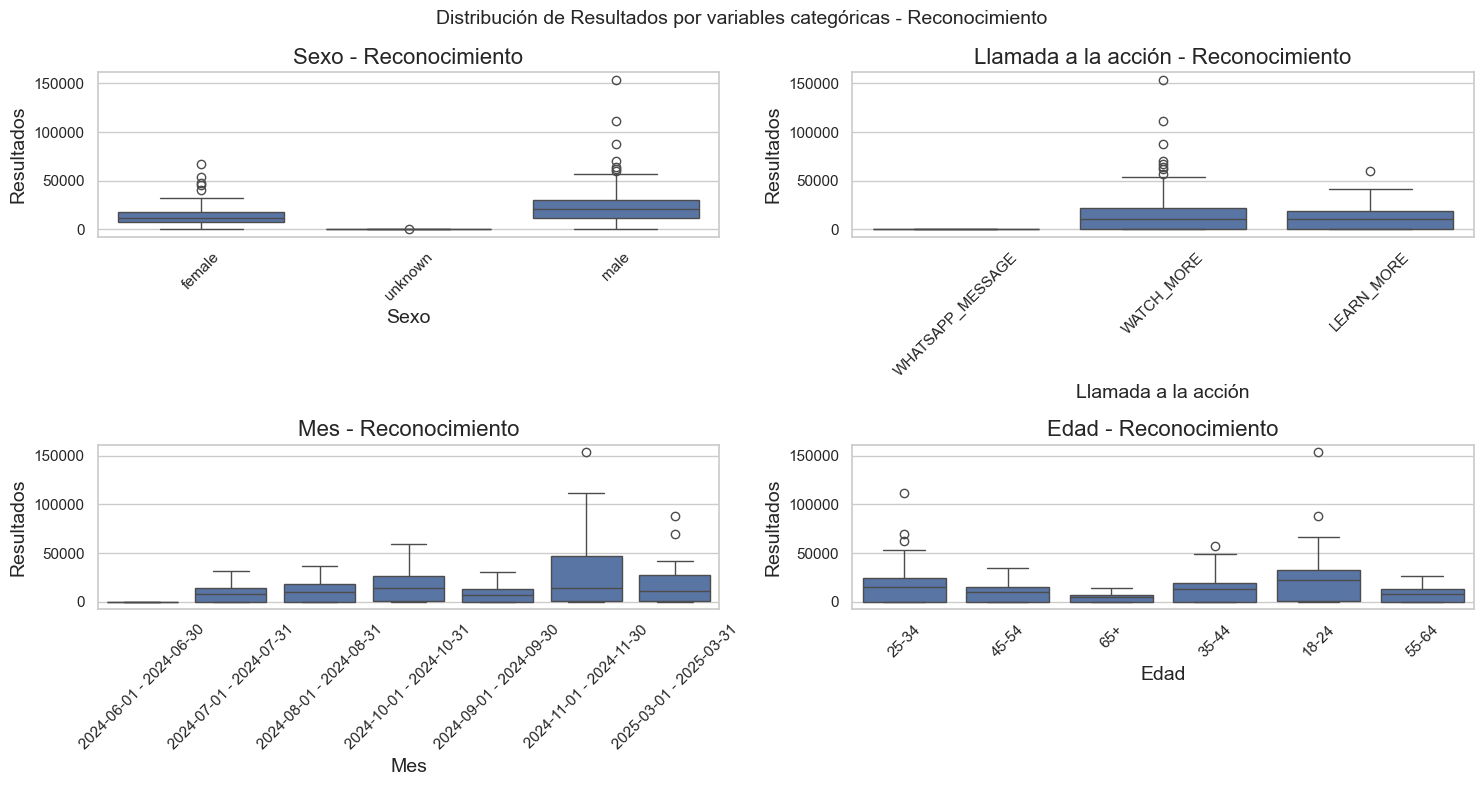

===== Clics en enlace =====


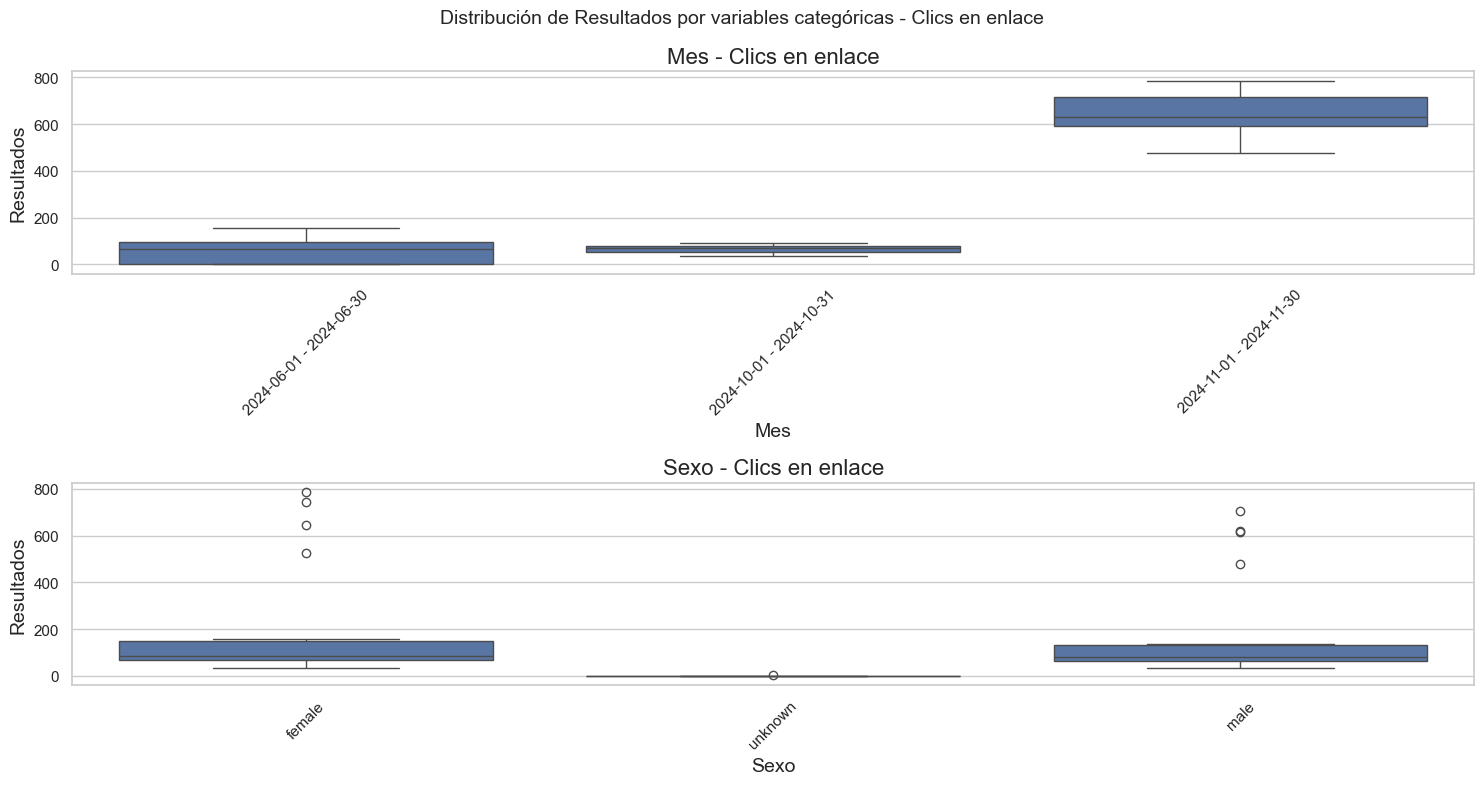

In [124]:
# ================================
# Relación entre variables categóricas y Resultados
# ================================
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]

    print(f"===== {objetivo} =====")
    cat_vars = vars_dict["categoricas"]

    # Crear figura de boxplots
    fig, axes = plt.subplots(2, (len(cat_vars) + 1) // 2, figsize=(15, 8))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        sns.boxplot(x=col, y="Resultados", data=df, ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Resultados")
        axes[i].tick_params(axis="x", rotation=45)

    plt.suptitle(f"Distribución de Resultados por variables categóricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

### Análisis bivariado de variables categóricas y *Resultados*

Al relacionar las variables categóricas con los *Resultados*, se identifican patrones diferenciales según cada objetivo:

- **Clientes potenciales**:  
  - **Sexo**: hombres y mujeres presentan comportamientos similares, mientras que *unknown* tiene un aporte prácticamente nulo.  
  - **Edad**: los grupos de **25–44 años** concentran la mayoría de los resultados, mientras que los extremos (18–24 y 65+) muestran un bajo rendimiento.  
  - **Mes**: se observan variaciones estacionales con picos destacados en ciertos meses (ej. agosto 2024).  
  - **Llamada a la acción**: *GET_QUOTE* y *LEARN_MORE* destacan como los más efectivos frente a otros botones.  

- **Reconocimiento**:  
  - **Sexo**: resultados relativamente equilibrados, con ligera ventaja en hombres.  
  - **Edad**: los mejores desempeños provienen de públicos jóvenes (**18–34 años**).  
  - **Llamada a la acción**: destacan *WATCH_MORE* y *LEARN_MORE* sobre *WHATSAPP_MESSAGE*.  
  - **Mes**: se identifican meses con mayor concentración de resultados, lo que sugiere efectos estacionales.  

- **Clics en enlace**:  
  - **Edad y sexo**: sin diferencias marcadas, aunque con ligeras ventajas en públicos jóvenes y en mujeres.  
  - **Mes**: algunos periodos específicos concentran gran parte de los clics, señalando momentos más efectivos para pautar.  

En conclusión, las variables categóricas aportan información clave para la **segmentación estratégica**, permitiendo identificar los grupos de edad, sexos, meses y llamadas a la acción más efectivos para maximizar los resultados.

# Limpieza de datos

## Manejo de valores nulos restantes

In [125]:
# ============================
# Manejo de valores nulos
# ============================

# Crear indicadores binarios para marcar valores ausentes en costo por resultado y CPC
df_meta['sin_resultado'] = df_meta['Costo por resultado'].isna().astype(int)
df_meta['sin_clics'] = df_meta['CPC (costo por clic en el enlace)'].isna().astype(int)

# Reemplazar nulos en CPM y CTR con la mediana (más robusta a distribuciones sesgadas)
df_meta['CPM (costo por mil impresiones)'] = df_meta['CPM (costo por mil impresiones)'].fillna(
    df_meta['CPM (costo por mil impresiones)'].median()
)
df_meta['CTR (todos)'] = df_meta['CTR (todos)'].fillna(
    df_meta['CTR (todos)'].median()
)

En esta celda se manejaron los valores faltantes de las variables numéricas:

- Se crearon las columnas `sin_resultado` y `sin_clics` como **indicadores binarios** para señalar si el dato original estaba ausente (1) o no (0).  
- En las columnas con pocos valores nulos (`CPM` y `CTR`), los faltantes se reemplazaron por la **mediana**, ya que es más robusta frente a distribuciones sesgadas.  

Esto permite conservar todos los registros y, al mismo tiempo, informar al modelo de qué valores estaban originalmente ausentes.

## Transformación de la columna Mes

In [126]:
# ============================
# Transformación de columna Mes
# ============================

# Separar la columna de rangos en fecha inicial y convertirla a datetime
df_meta['Mes_inicio'] = df_meta['Mes'].str.split(' - ').str[0]
df_meta['Mes_inicio'] = pd.to_datetime(df_meta['Mes_inicio'], errors='coerce')

# Crear nuevas variables a partir de la fecha
df_meta['Mes1'] = df_meta['Mes_inicio'].dt.month
df_meta['Año'] = df_meta['Mes_inicio'].dt.year

En esta celda se transformó la columna `Mes`, que originalmente estaba en formato de rango de fechas, en nuevas variables más útiles:

- `Mes1`: número del mes (1–12).  
- `Año`: año correspondiente.  

De esta forma, se facilita el análisis temporal y se ofrece al modelo información más clara sobre la estacionalidad de las campañas.

In [127]:
#Verificación del dataset
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Nombre de la campaña                    2220 non-null   object        
 1   Identificador de la campaña             2220 non-null   int64         
 2   Nombre del conjunto de anuncios         2220 non-null   object        
 3   Identificador del conjunto de anuncios  2220 non-null   int64         
 4   Nombre del anuncio                      2220 non-null   object        
 5   Identificador del anuncio               2220 non-null   int64         
 6   Mes                                     2220 non-null   object        
 7   Objetivo                                2220 non-null   object        
 8   Edad                                    2220 non-null   object        
 9   Sexo                                    2220 non-nul

# Modelado Predictivo y Comparación de Algoritmos por Objetivo de Campaña

In [128]:
# ================================
# Definición de variables por objetivo
# ================================
vars_por_objetivo1 = {
    "Clientes potenciales": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Edad", "Mes1", "Año", "Llamada a la acción"]
    },
    "Reconocimiento": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Edad", "Mes1", "Año", "Llamada a la acción"]
    },
    "Clics en enlace": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Mes1", "Año"]
    }
}

In [129]:
# ================================
# Preprocesador por objetivo
# ================================
def crear_preprocesador(objetivo):
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), vars_por_objetivo1[objetivo]["numericas"]),
            ("cat", OneHotEncoder(handle_unknown="ignore"), vars_por_objetivo1[objetivo]["categoricas"])
        ]
    )

In [130]:
# ================================
# Modelos lineales: Ridge, Lasso y Regresión Lineal
# ================================
def evaluar_objetivo(objetivo, df):
    X = df[vars_por_objetivo1[objetivo]["numericas"] + vars_por_objetivo1[objetivo]["categoricas"]]
    y = df["Resultados"]

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesador
    preprocessor = crear_preprocesador(objetivo)

    # Modelos
    modelos = {
        "Ridge": Ridge(),
        "Lasso": Lasso(max_iter=5000),
        "Lineal": LinearRegression()
    }

    # Hiperparámetros
    param_grid = {
        "Ridge": {"model__alpha": [0.01, 0.1, 1, 10, 100]},
        "Lasso": {"model__alpha": [0.01, 0.1, 1, 10, 100]}
    }

    resultados = {}

    for nombre, modelo in modelos.items():
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", modelo)
        ])

        if nombre in ["Ridge", "Lasso"]:
            grid = GridSearchCV(pipe, param_grid[nombre], cv=5, scoring="r2", n_jobs=-1)
            grid.fit(X_train, y_train)
            mejor_modelo = grid.best_estimator_
            mejor_alpha = grid.best_params_["model__alpha"]
        else:
            mejor_modelo = pipe.fit(X_train, y_train)
            mejor_alpha = None

        # Evaluación en test
        y_pred = mejor_modelo.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        resultados[nombre] = {
            "R2": r2,
            "RMSE": rmse,
            "MAE": mae,
            "Alpha": mejor_alpha
        }

    return resultados

In [131]:
for obj in vars_por_objetivo1.keys():
    print(f"\n===== {obj} =====")
    resultados = evaluar_objetivo(obj, df_meta)
    for modelo, metricas in resultados.items():
        print(f"{modelo}: R²={metricas['R2']:.3f}, RMSE={metricas['RMSE']:.3f}, "
              f"MAE={metricas['MAE']:.3f}, Alpha={metricas['Alpha']}")


===== Clientes potenciales =====
Ridge: R²=0.531, RMSE=4280.019, MAE=2220.908, Alpha=10
Lasso: R²=0.540, RMSE=4238.200, MAE=2236.547, Alpha=10
Lineal: R²=0.535, RMSE=4263.863, MAE=2341.574, Alpha=None

===== Reconocimiento =====
Ridge: R²=0.531, RMSE=4280.019, MAE=2220.908, Alpha=10
Lasso: R²=0.540, RMSE=4238.200, MAE=2236.547, Alpha=10
Lineal: R²=0.535, RMSE=4263.863, MAE=2341.574, Alpha=None

===== Clics en enlace =====
Ridge: R²=0.412, RMSE=4794.863, MAE=1990.306, Alpha=100
Lasso: R²=0.434, RMSE=4701.021, MAE=2099.473, Alpha=10
Lineal: R²=0.434, RMSE=4702.064, MAE=2136.913, Alpha=None


In [132]:
# ================================
# Modelos avanzados: RandomForest, GradientBoosting y XGBoost
# ================================
def evaluar_objetivo_avanzado(objetivo, df):
    X = df[vars_por_objetivo1[objetivo]["numericas"] + vars_por_objetivo1[objetivo]["categoricas"]]
    y = df["Resultados"]

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesador
    preprocessor = crear_preprocesador(objetivo)

    # Modelos a evaluar
    modelos1 = {
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42, verbosity=0)
    }

    # Hiperparámetros para GridSearch
    param_grid = {
        "RandomForest": {"model__n_estimators": [100, 200], "model__max_depth": [None, 5, 10]},
        "GradientBoosting": {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1]},
        "XGBoost": {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1], "model__max_depth": [3, 5]}
    }

    resultados = {}
    modelos_guardados = {}  # <- aquí guardamos modelo + datos

    for nombre, modelo in modelos1.items():
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", modelo)
        ])

        grid = GridSearchCV(pipe, param_grid[nombre], cv=3, scoring="r2", n_jobs=-1)
        grid.fit(X_train, y_train)

        mejor_modelo = grid.best_estimator_
        y_pred = mejor_modelo.predict(X_test)

        # Métricas
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        resultados[nombre] = {
            "R2": r2,
            "RMSE": rmse,
            "MAE": mae,
            "Mejores params": grid.best_params_
        }

        # Guardamos modelo + datos para scatterplots
        modelos_guardados[nombre] = (mejor_modelo, X_test, y_test)

    return resultados, modelos_guardados

In [133]:
resultados_globales = {}
modelos_guardados = {}

for obj in vars_por_objetivo1.keys():
    print(f"\n===== {obj} =====")
    
    resultados, modelos = evaluar_objetivo_avanzado(obj, df_meta)  # <-- aquí se desempaquetan
    
    resultados_globales[obj] = resultados
    modelos_guardados[obj] = modelos

    for modelo, metricas in resultados.items():
        print(f"{modelo}: R²={metricas['R2']:.3f}, RMSE={metricas['RMSE']:.3f}, "
              f"MAE={metricas['MAE']:.3f}, Params={metricas['Mejores params']}")


===== Clientes potenciales =====
RandomForest: R²=0.939, RMSE=1541.617, MAE=290.328, Params={'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R²=0.927, RMSE=1685.997, MAE=457.719, Params={'model__learning_rate': 0.05, 'model__n_estimators': 200}
XGBoost: R²=0.959, RMSE=1267.220, MAE=254.154, Params={'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100}

===== Reconocimiento =====
RandomForest: R²=0.939, RMSE=1541.617, MAE=290.328, Params={'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R²=0.927, RMSE=1685.997, MAE=457.719, Params={'model__learning_rate': 0.05, 'model__n_estimators': 200}
XGBoost: R²=0.959, RMSE=1267.220, MAE=254.154, Params={'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100}

===== Clics en enlace =====
RandomForest: R²=0.940, RMSE=1536.165, MAE=273.455, Params={'model__max_depth': 10, 'model__n_estimators': 200}
GradientBoosting: R²=0.881, RMSE=2155.020, MAE=511.94

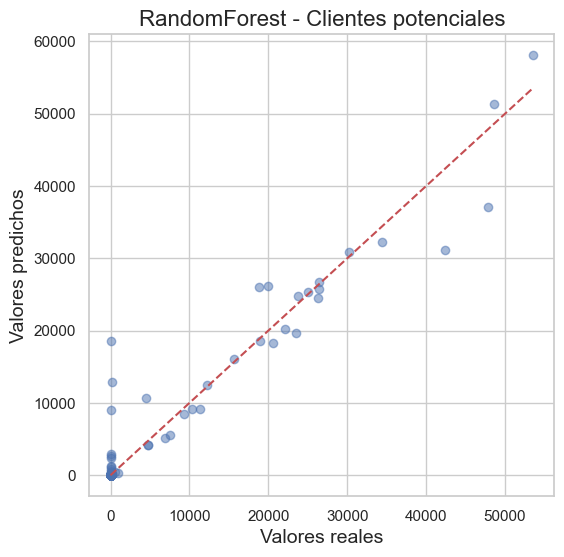

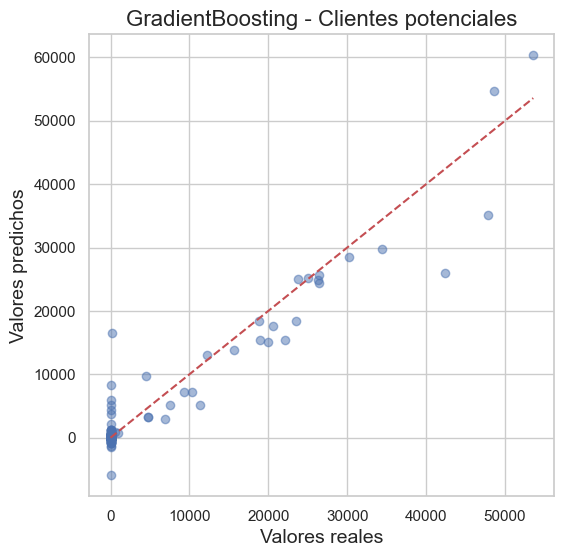

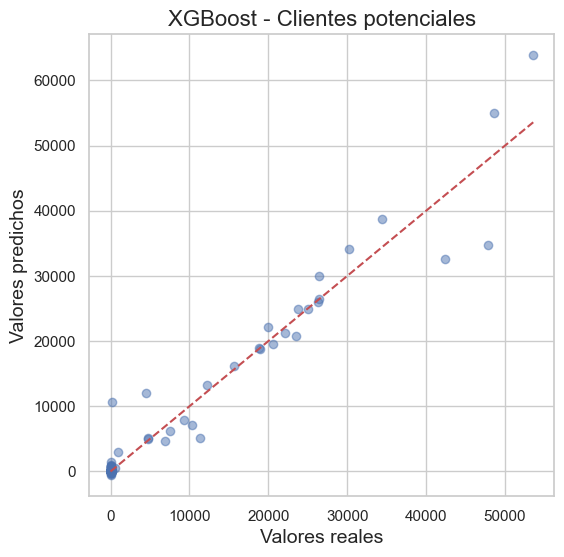

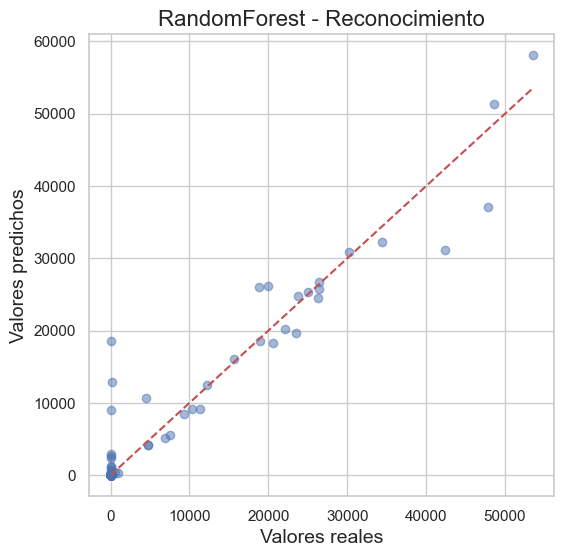

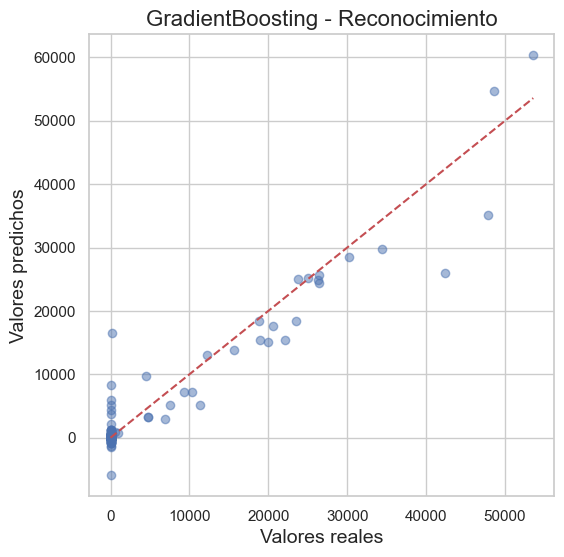

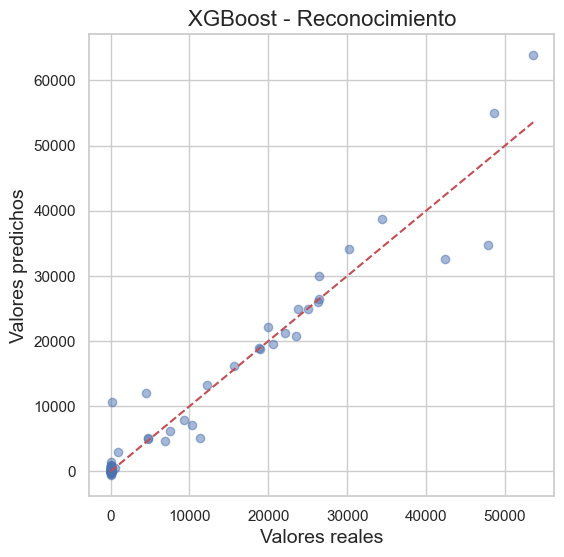

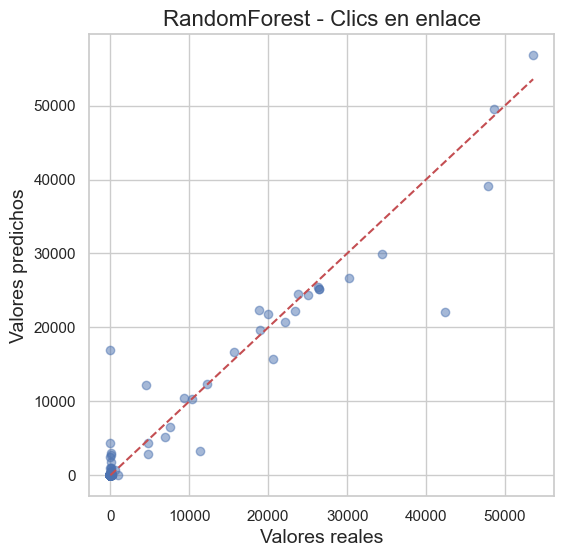

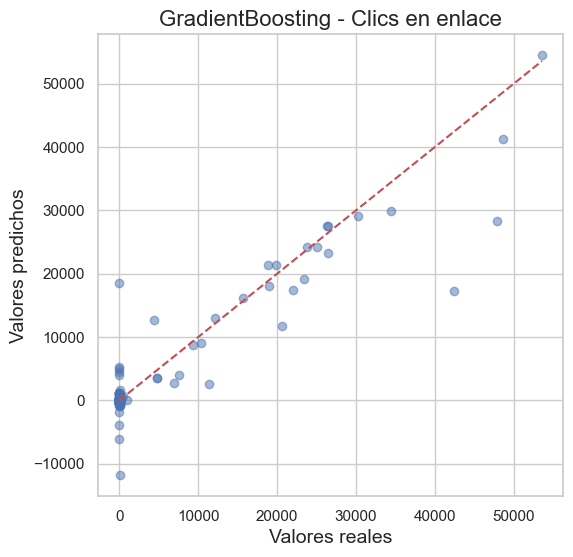

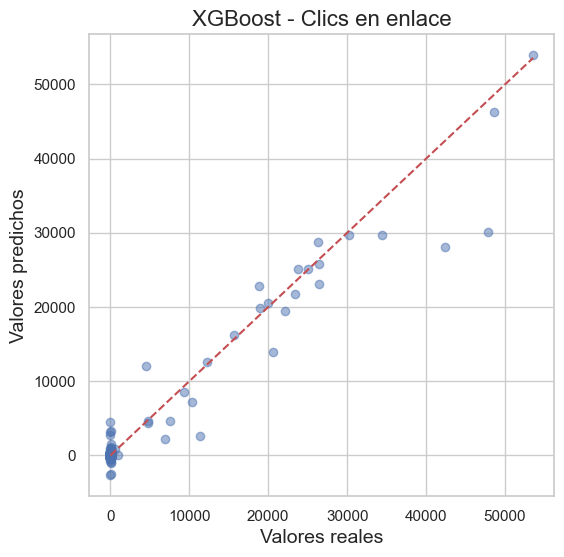

In [134]:
# ==============================
# Scatterplots para todos los objetivos y modelos
# ==============================
def scatterplots_todos(modelos_guardados):
    for obj, entrenados in modelos_guardados.items():
        for nombre, (modelo, X_test, y_test) in entrenados.items():
            y_pred = modelo.predict(X_test)

            plt.figure(figsize=(6,6))
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
            plt.xlabel("Valores reales")
            plt.ylabel("Valores predichos")
            plt.title(f"{nombre} - {obj}")
            plt.show()

# Ejecutar scatterplots
scatterplots_todos(modelos_guardados)

In [135]:
# Crear diccionario de resultados
resultados_globales = {
    "Clientes potenciales": evaluar_objetivo_avanzado("Clientes potenciales", df_meta)[0],  
    "Reconocimiento": evaluar_objetivo_avanzado("Reconocimiento", df_meta)[0],
    "Clics en enlace": evaluar_objetivo_avanzado("Clics en enlace", df_meta)[0]
}

# Ahora sí construir la tabla comparativa
df_comparativa = mostrar_tabla_comparativa(resultados_globales)

display(df_comparativa)

NameError: name 'mostrar_tabla_comparativa' is not defined

### Comparación de modelos lineales vs. modelos avanzados

#### Modelos lineales (Ridge, Lasso y Regresión Lineal)
Los resultados iniciales muestran un desempeño bastante bajo en todos los objetivos de campaña:

- **Clientes potenciales (Leads):** R² ≈ 0.53 – 0.54  
- **Reconocimiento:** R² ≈ 0.53 – 0.54  
- **Clics en enlace:** R² ≈ 0.41 – 0.43  

Esto indica que los modelos lineales apenas logran explicar entre el 40% y el 54% de la varianza de los resultados.  

**Posibles causas de este bajo desempeño:**
1. Relaciones **no lineales** entre las variables y los resultados.
2. **Multicolinealidad extrema** entre Importe gastado, Impresiones y Clics en el enlace.
3. **Sesgo y outliers** muy grandes que distorsionan los ajustes.
4. Diferencias de **escala en la variable objetivo** según el tipo de campaña.
5. La **regularización** de Ridge y Lasso no es suficiente para capturar la complejidad de los datos.

---

#### Modelos avanzados (RandomForest, GradientBoosting y XGBoost)
En contraste, los modelos avanzados presentan una mejora drástica:

- **Clientes potenciales y Reconocimiento:** R² entre **0.92 y 0.96**  
- **Clics en enlace:** R² entre **0.88 y 0.94**  

Además, los errores (RMSE y MAE) son considerablemente más bajos que en los modelos lineales.  

**Razones de la mejora:**
1. Capturan **relaciones no lineales** y complejas.  
2. Son menos sensibles a **outliers**.  
3. Detectan automáticamente **interacciones entre variables** (ej. inversión × mes).  
4. Aplican **regularización integrada**, lo que mejora la estabilidad y reduce sobreajuste.  

---

**Conclusión:**  
Los resultados confirman que las campañas de Meta Ads no pueden modelarse adecuadamente con métodos lineales simples, debido a la complejidad, la presencia de outliers y la fuerte multicolinealidad.  
En cambio, los modelos avanzados (basados en árboles y ensambles) logran capturar estas dinámicas con alta precisión, consolidándose como las mejores opciones para predecir resultados y optimizar la inversión en campañas.

## Importancia de variables con Random Forest

En esta sección se utiliza un modelo de **RandomForestRegressor** para calcular la importancia de las variables en el objetivo **Clientes Potenciales**.  
El objetivo es identificar cuáles variables aportan más a la predicción de resultados.

In [ ]:
# ============================================
#  Importancia de variables
# ============================================

def importancia_variables(modelo, X_train, preprocessor):
    """
    Calcula la importancia de las variables en un modelo basado en árboles.
    Combina variables numéricas y categóricas transformadas.
    """
    # Recuperar nombres de columnas transformadas
    columnas_num = preprocessor.transformers_[0][2]  # variables numéricas originales
    columnas_cat = list(
        preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])
    )  # variables categóricas después del OneHotEncoding
    
    columnas_finales = columnas_num + columnas_cat

    # Importancia calculada por el modelo
    importancias = modelo.named_steps["model"].feature_importances_

    return pd.DataFrame({
        "Variable": columnas_finales,
        "Importancia": importancias
    }).sort_values(by="Importancia", ascending=False)


# Ejemplo: importancia de variables en Clientes Potenciales con RandomForest
pipe = Pipeline([
    ("preprocess", crear_preprocesador("Clientes potenciales")),
    ("model", RandomForestRegressor(random_state=42, n_estimators=200))
])

# Entrenar el modelo
pipe.fit(
    df_meta[vars_por_objetivo1["Clientes potenciales"]["numericas"] +
            vars_por_objetivo1["Clientes potenciales"]["categoricas"]],
    df_meta["Resultados"]
)

# Calcular importancias
importancias_rf = importancia_variables(pipe, df_meta, pipe.named_steps["preprocess"])
display(importancias_rf)

### Interpretación de resultados de la importancia de variables

- **Importe gastado (COP)** es la variable con mayor peso (≈ 40%), confirmando que la inversión es el factor más determinante en los resultados.
- **Impresiones** ocupa el segundo lugar (≈ 26%), lo cual es consistente, ya que a mayor exposición del anuncio, más oportunidades de generar resultados.
- Las **llamadas a la acción (WATCH_MORE y LEARN_MORE)** también muestran un peso importante, indicando que la elección del CTA puede modificar significativamente la efectividad de la campaña.
- **Clics en el enlace** aporta menor relevancia de la esperada, sugiriendo que su efecto ya está capturado indirectamente por el gasto y las impresiones.
- Variables como **edad, sexo y mes** tienen importancias muy bajas (<1%), lo que indica que influyen poco en comparación con las variables de inversión y exposición.

## Conclusión General del Proyecto

El análisis realizado sobre las campañas de Meta Ads permitió identificar patrones clave en el comportamiento de las variables, así como evaluar el desempeño de diferentes modelos predictivos para explicar los resultados obtenidos.

### Principales hallazgos:
- **Dependencia de la inversión**: El **importe gastado** y las **impresiones** son los factores más determinantes en el desempeño de las campañas. Esto refuerza la lógica de que mayor inversión y visibilidad generan más resultados.
- **Importancia del CTA**: Las **llamadas a la acción (WATCH_MORE y LEARN_MORE)** demostraron ser más efectivas que otras, lo cual valida la necesidad de diseñar CTAs alineados con el objetivo de la campaña.
- **Segmentación demográfica**: Variables como **edad, sexo y mes** mostraron baja relevancia en los modelos, lo que sugiere que los resultados dependen más de factores estructurales (presupuesto y exposición) que de segmentaciones demográficas.
- **Modelos predictivos**: Los modelos lineales (Ridge, Lasso y Regresión Lineal) tuvieron bajo desempeño (R² < 0.55), lo cual evidencia que no capturan adecuadamente la complejidad de los datos. En contraste, los modelos avanzados como **RandomForest y XGBoost** alcanzaron valores de R² superiores al 0.93, mostrando que los resultados son mejor explicados por relaciones no lineales y complejas entre variables.

### Limitaciones:
- **Sesgo temporal**: Los datos abarcan un periodo específico y no contemplan campañas futuras, lo que limita la generalización de los resultados.
- **Multicolinealidad**: La alta correlación entre inversión, impresiones y clics genera redundancia en la información, lo que puede distorsionar la interpretación directa de algunas métricas.
- **Datos de campañas excluidas**: Algunos objetivos como *Ventas* e *Interacción* se descartaron por falta de resultados, lo que limita el alcance a solo tres tipos de campaña.

### Recomendaciones:
1. **Optimización de presupuesto**: Priorizar la eficiencia del gasto y la generación de impresiones como palancas clave de resultados.
2. **Refuerzo de CTAs efectivos**: Diseñar campañas con énfasis en botones como *WATCH_MORE* y *LEARN_MORE*, que demostraron mayor impacto.
3. **Monitoreo continuo**: Implementar un sistema de seguimiento con modelos avanzados (RandomForest o XGBoost) para anticipar resultados y ajustar en tiempo real.
4. **Análisis adicional**: Complementar este estudio con métricas de calidad de los leads y tasa de conversión real, para vincular los resultados de Meta Ads con indicadores de negocio más estratégicos.

📌 **Conclusión final**:  
Las campañas de Meta Ads en este análisis confirman que el desempeño se explica principalmente por el **nivel de inversión y la visibilidad alcanzada**, mientras que la segmentación demográfica tiene un papel secundario.  
El uso de modelos avanzados de machine learning ofrece una herramienta poderosa para predecir y optimizar resultados, apoyando la toma de decisiones estratégicas en futuras campañas.